In [1]:
from dataloader import PriceScenarioDataset
from utils import VaR, ES, score
from Discriminator import Discriminator
from Generator import Generator
from Tradining_Strategies import TradingStrategy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from preprocess.acf import *
# from preprocess.gaussianize import *

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
# from model.torch_tcn import *
import matplotlib.pyplot as plt
from os import listdir
import seaborn as sns
from os.path import isfile, join

In [2]:
num_epochs = 100
# nz = 3
batch_size = 1000
#seq_len = 127
# clip= 0.01
lr = 1e-5

noise_size=100
pnl_size=100
market_size=5

if torch.cuda.is_available():  
  dev = "cuda" 
else:  
  dev = "cpu"

device = torch.device(dev) 

In [3]:
from scipy.stats import norm
def gen_toy_sample(x0,n):
    x0 = np.asarray(x0)
    N = norm.rvs(size=(n), scale=1e-3)
    u = np.concatenate((np.random.uniform(-1.5e-3,-8e-4,int(n/2)),np.random.uniform(4e-4,8e-4,int(n/2))))
    r = N+u
    out = np.empty(r.shape)
    np.cumsum(r, axis=-1, out=out)
    out += np.expand_dims(x0, axis=-1)
    return out
toy_sample_n = 50000
toy_sample = []
for i in range(toy_sample_n):
    toy_sample.append(gen_toy_sample(1,100))
toy_sample = np.array(toy_sample)

toy_sample_price_scenarios = np.empty(toy_sample.shape)
for i in range(toy_sample_n):
    toy_sample_price_scenarios[i,:] = toy_sample[i,:] #np.log(toy_sample[i,:]/toy_sample[i,0])
#     plt.plot(list(range(100)),toy_sample_price_scenarios[i,:])

In [4]:
toy_sample_price_scenarios=np.log(toy_sample_price_scenarios[:,:]/toy_sample_price_scenarios[:,0].reshape(-1,1))
# for i in range(toy_sample_n):
#     plt.plot(list(range(100)),toy_sample_price_scenarios[i,:])

In [5]:
toy_sample_tensor = torch.tensor(toy_sample_price_scenarios).cuda()
dataloader = torch.utils.data.DataLoader(toy_sample_tensor, batch_size=batch_size,drop_last=True,shuffle=True)

In [6]:
import torch.optim as optim
from tqdm import tqdm
generator = Generator(noise_size=noise_size,
                      pnl_size=pnl_size,market_size=batch_size
                     ).to(device)
discriminator = Discriminator(pnl_size=pnl_size).to(device)
disc_optimizer = optim.Adam(discriminator.parameters(), lr=1e-7)
gen_optimizer = optim.Adam(generator.parameters(), lr=1e-6)

# scheduler_disc = torch.optim.lr_scheduler.CosineAnnealingLR(disc_optimizer, T_max=1000, eta_min=0)
# scheduler_gen = torch.optim.lr_scheduler.CosineAnnealingLR(gen_optimizer, T_max=1000, eta_min=0)

Discriminator Loss: -0.00005029 Generator Loss: -0.00192123:   0%|                 | 4/10000 [00:10<6:49:07,  2.46s/it]

current fake and real ves and funres:  tensor([ 0.0343, -0.0165], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0351, -0.0160], device='cuda:0', grad_fn=<SelectBackward0>)


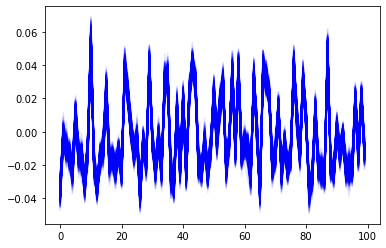

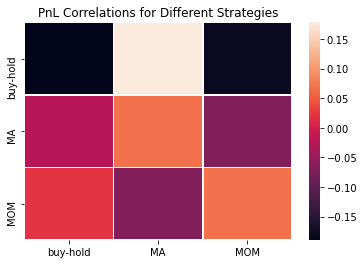

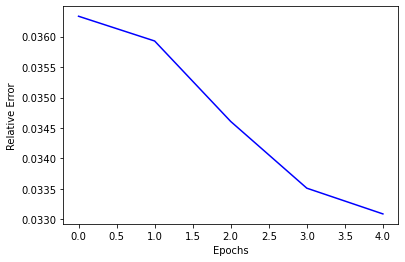

Discriminator Loss: -0.00006986 Generator Loss: -0.00197769:   0%|                 | 9/10000 [00:23<6:55:06,  2.49s/it]

current fake and real ves and funres:  tensor([ 0.0340, -0.0165], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0353, -0.0159], device='cuda:0', grad_fn=<SelectBackward0>)


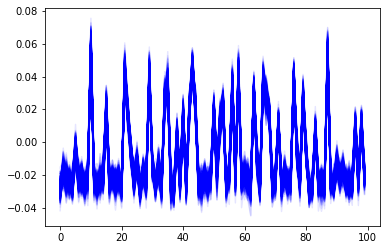

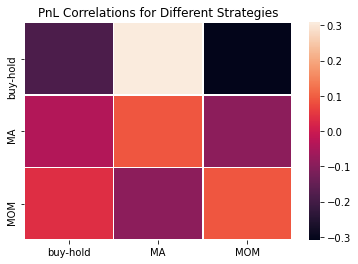

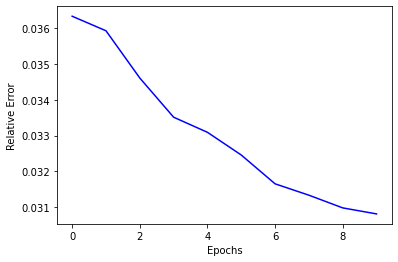

Discriminator Loss: -0.00005035 Generator Loss: -0.00208530:   0%|                | 14/10000 [00:36<6:52:34,  2.48s/it]

current fake and real ves and funres:  tensor([ 0.0329, -0.0169], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0358, -0.0157], device='cuda:0', grad_fn=<SelectBackward0>)


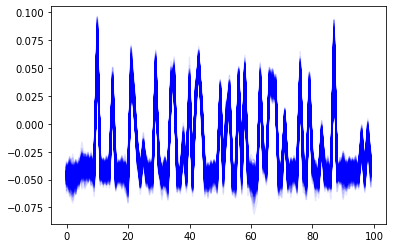

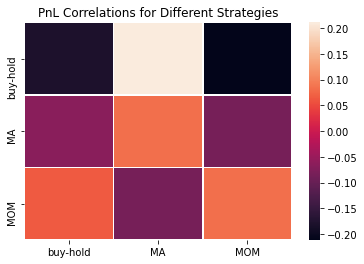

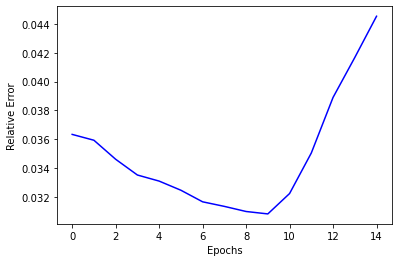

Discriminator Loss: -0.00007446 Generator Loss: -0.00215979:   0%|                | 19/10000 [00:50<6:53:33,  2.49s/it]

current fake and real ves and funres:  tensor([ 0.0326, -0.0163], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0363, -0.0156], device='cuda:0', grad_fn=<SelectBackward0>)


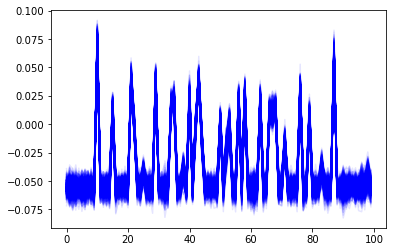

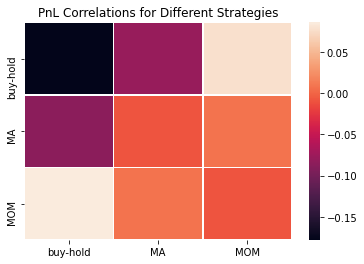

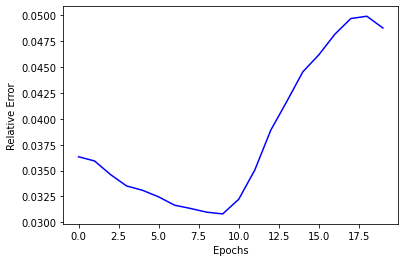

Discriminator Loss: -0.00013371 Generator Loss: -0.00209611:   0%|                | 24/10000 [01:03<6:53:18,  2.49s/it]

current fake and real ves and funres:  tensor([ 0.0338, -0.0161], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0368, -0.0155], device='cuda:0', grad_fn=<SelectBackward0>)


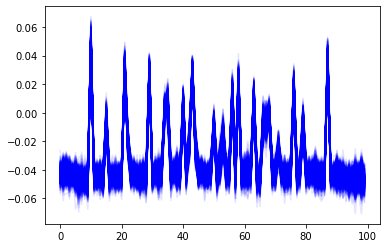

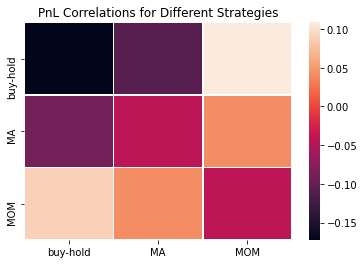

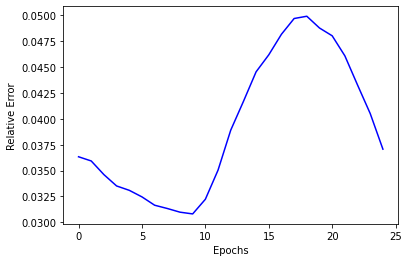

Discriminator Loss: -0.00004265 Generator Loss: -0.00225157:   0%|                | 29/10000 [01:16<6:51:50,  2.48s/it]

current fake and real ves and funres:  tensor([ 0.0374, -0.0156], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0371, -0.0154], device='cuda:0', grad_fn=<SelectBackward0>)


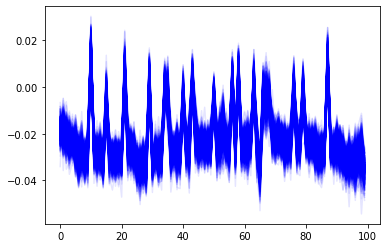

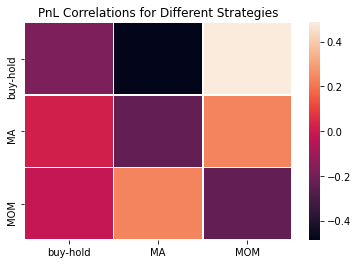

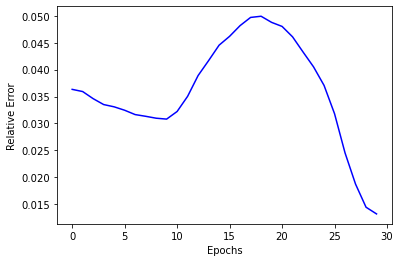

Discriminator Loss: -0.00001371 Generator Loss: -0.00238974:   0%|                | 34/10000 [01:29<6:50:42,  2.47s/it]

current fake and real ves and funres:  tensor([ 0.0375, -0.0155], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0374, -0.0156], device='cuda:0', grad_fn=<SelectBackward0>)


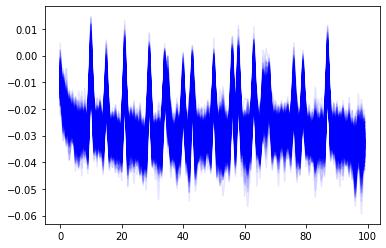

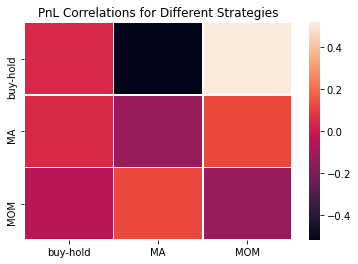

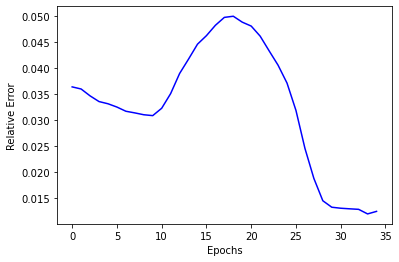

Discriminator Loss: -0.00003373 Generator Loss: -0.00233360:   0%|                | 39/10000 [01:42<6:49:52,  2.47s/it]

current fake and real ves and funres:  tensor([ 0.0365, -0.0155], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0375, -0.0157], device='cuda:0', grad_fn=<SelectBackward0>)


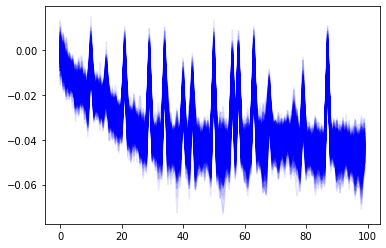

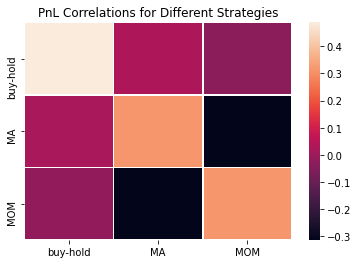

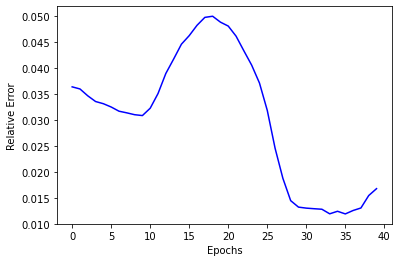

Discriminator Loss: -0.00004145 Generator Loss: -0.00237434:   0%|                | 44/10000 [01:56<6:58:46,  2.52s/it]

current fake and real ves and funres:  tensor([ 0.0373, -0.0157], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0378, -0.0158], device='cuda:0', grad_fn=<SelectBackward0>)


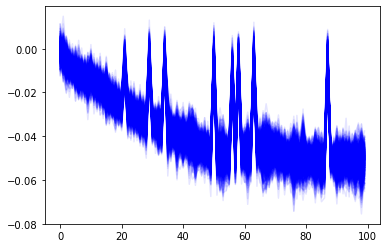

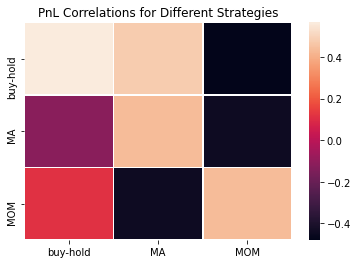

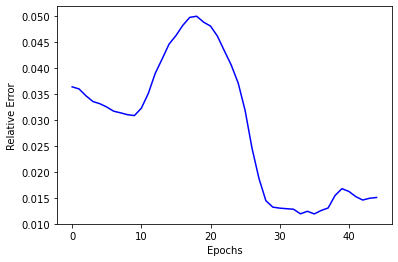

Discriminator Loss: -0.00002987 Generator Loss: -0.00243772:   0%|                | 49/10000 [02:09<6:50:36,  2.48s/it]

current fake and real ves and funres:  tensor([ 0.0375, -0.0157], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0382, -0.0158], device='cuda:0', grad_fn=<SelectBackward0>)


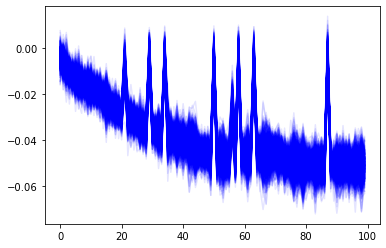

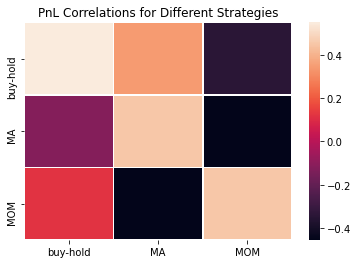

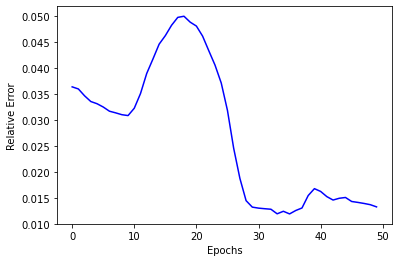

Discriminator Loss: -0.00002289 Generator Loss: -0.00247665:   1%|                | 54/10000 [02:24<7:18:39,  2.65s/it]

current fake and real ves and funres:  tensor([ 0.0378, -0.0157], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0381, -0.0158], device='cuda:0', grad_fn=<SelectBackward0>)


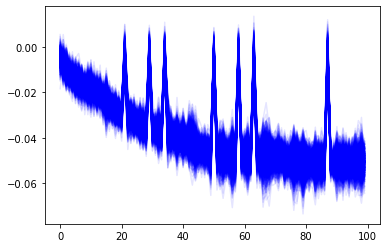

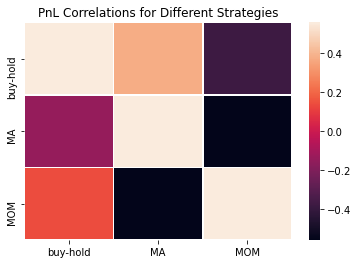

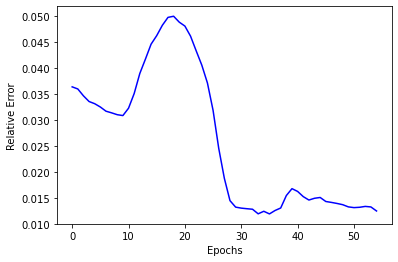

Discriminator Loss: -0.00000611 Generator Loss: -0.00242829:   1%|                | 59/10000 [02:37<7:03:12,  2.55s/it]

current fake and real ves and funres:  tensor([ 0.0374, -0.0157], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0382, -0.0157], device='cuda:0', grad_fn=<SelectBackward0>)


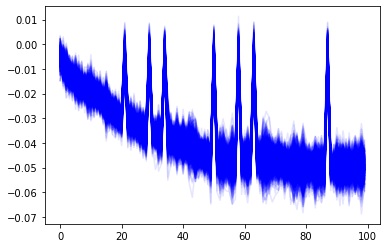

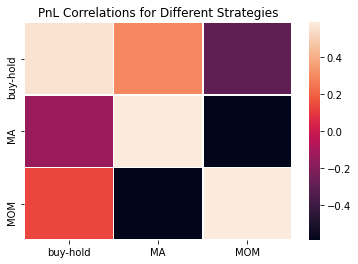

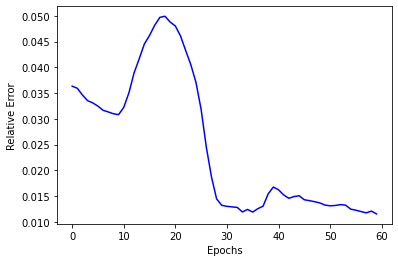

Discriminator Loss: -0.00000253 Generator Loss: -0.00247793:   1%|                | 64/10000 [02:51<6:59:29,  2.53s/it]

current fake and real ves and funres:  tensor([ 0.0380, -0.0157], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0383, -0.0157], device='cuda:0', grad_fn=<SelectBackward0>)


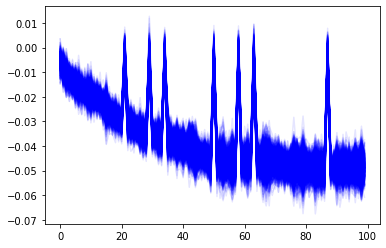

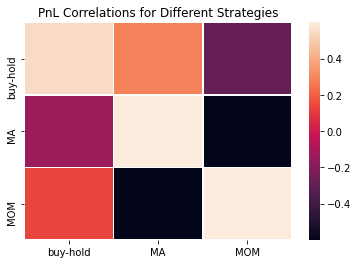

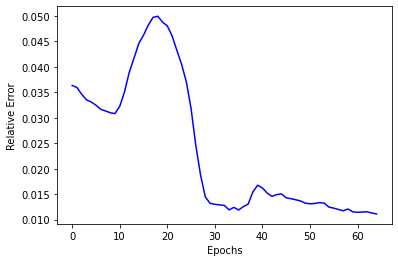

Discriminator Loss: 0.00001745 Generator Loss: -0.00245869:   1%|                 | 69/10000 [03:04<7:00:12,  2.54s/it]

current fake and real ves and funres:  tensor([ 0.0380, -0.0156], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0382, -0.0156], device='cuda:0', grad_fn=<SelectBackward0>)


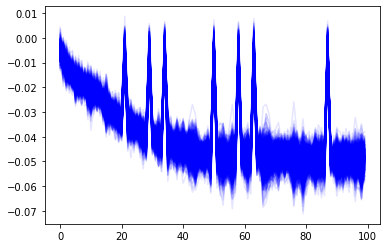

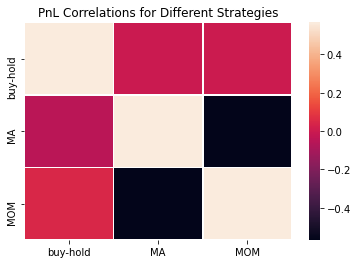

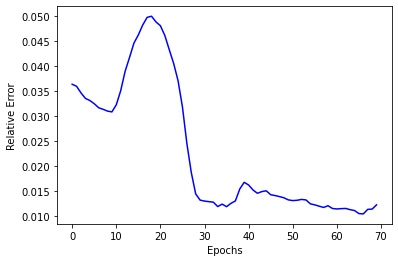

Discriminator Loss: 0.00002817 Generator Loss: -0.00250806:   1%|▏                | 74/10000 [03:18<7:02:57,  2.56s/it]

current fake and real ves and funres:  tensor([ 0.0383, -0.0157], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0370, -0.0155], device='cuda:0', grad_fn=<SelectBackward0>)


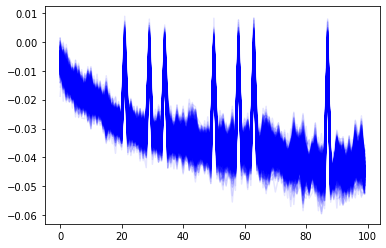

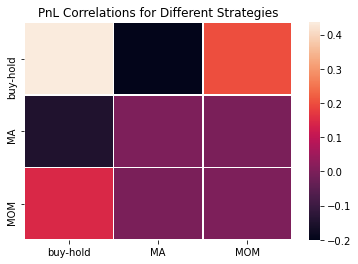

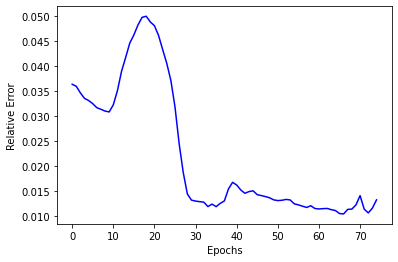

Discriminator Loss: -0.00004110 Generator Loss: -0.00241031:   1%|▏               | 79/10000 [03:32<7:03:31,  2.56s/it]

current fake and real ves and funres:  tensor([ 0.0369, -0.0157], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0377, -0.0157], device='cuda:0', grad_fn=<SelectBackward0>)


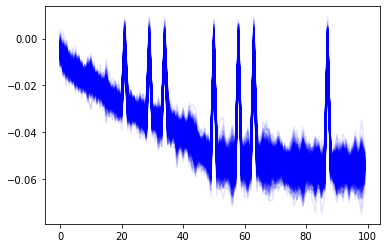

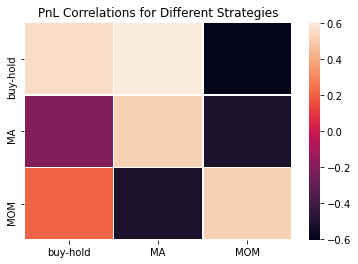

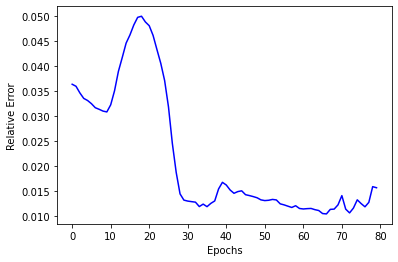

Discriminator Loss: 0.00002017 Generator Loss: -0.00249025:   1%|▏                | 84/10000 [03:45<7:01:53,  2.55s/it]

current fake and real ves and funres:  tensor([ 0.0382, -0.0157], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0383, -0.0157], device='cuda:0', grad_fn=<SelectBackward0>)


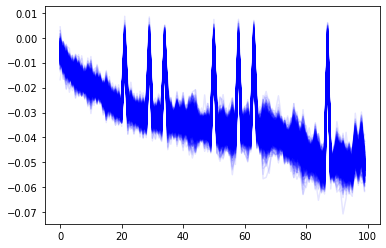

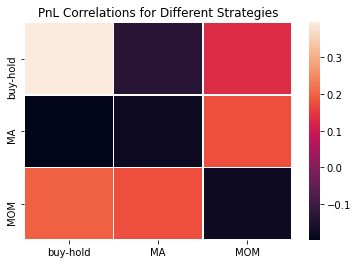

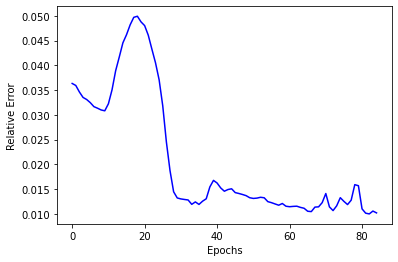

Discriminator Loss: -0.00003096 Generator Loss: -0.00245279:   1%|▏               | 89/10000 [04:00<7:28:34,  2.72s/it]

current fake and real ves and funres:  tensor([ 0.0378, -0.0158], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0377, -0.0158], device='cuda:0', grad_fn=<SelectBackward0>)


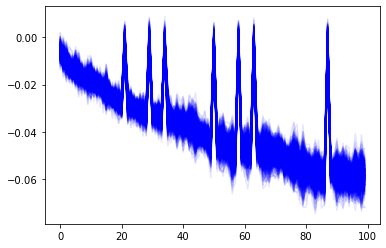

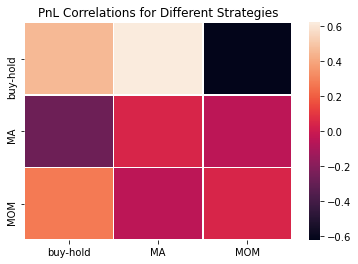

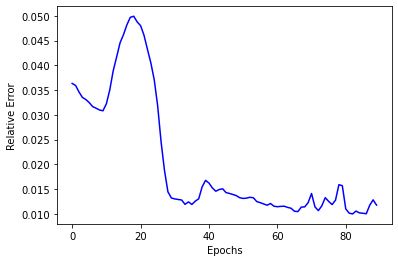

Discriminator Loss: 0.00001523 Generator Loss: -0.00249897:   1%|▏                | 94/10000 [04:13<6:58:32,  2.54s/it]

current fake and real ves and funres:  tensor([ 0.0381, -0.0157], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0374, -0.0157], device='cuda:0', grad_fn=<SelectBackward0>)


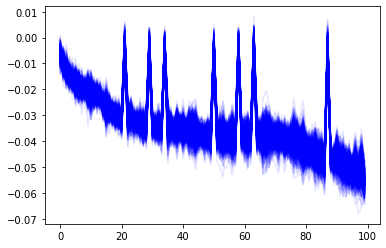

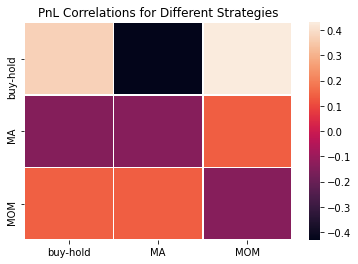

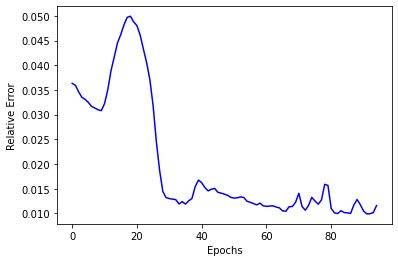

Discriminator Loss: -0.00007339 Generator Loss: -0.00243219:   1%|▏               | 99/10000 [04:26<6:51:45,  2.50s/it]

current fake and real ves and funres:  tensor([ 0.0377, -0.0160], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0386, -0.0159], device='cuda:0', grad_fn=<SelectBackward0>)


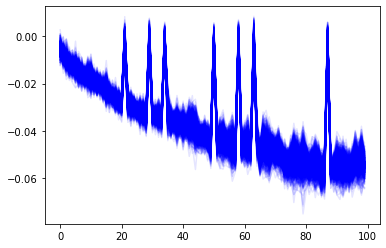

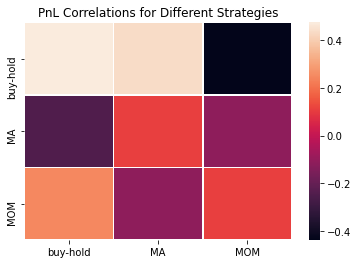

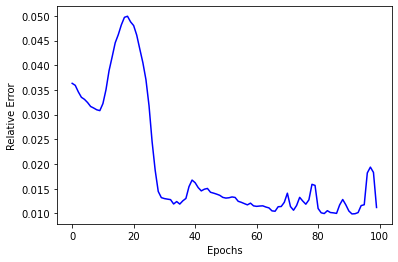

Discriminator Loss: 0.00003435 Generator Loss: -0.00251748:   1%|▏               | 104/10000 [04:39<6:53:37,  2.51s/it]

current fake and real ves and funres:  tensor([ 0.0385, -0.0157], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0373, -0.0158], device='cuda:0', grad_fn=<SelectBackward0>)


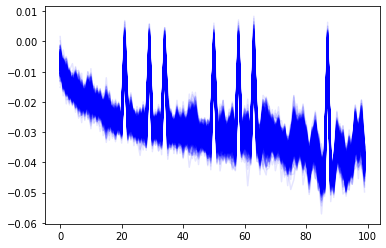

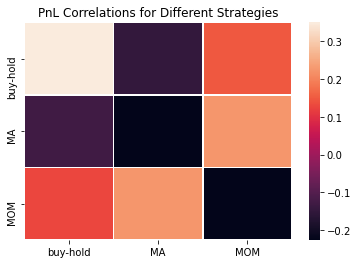

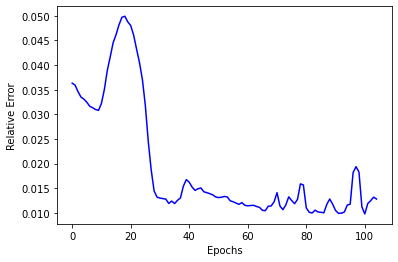

Discriminator Loss: -0.00000037 Generator Loss: -0.00256579:   1%|▏              | 109/10000 [04:53<7:00:04,  2.55s/it]

current fake and real ves and funres:  tensor([ 0.0376, -0.0157], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0383, -0.0156], device='cuda:0', grad_fn=<SelectBackward0>)


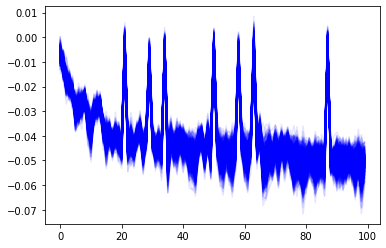

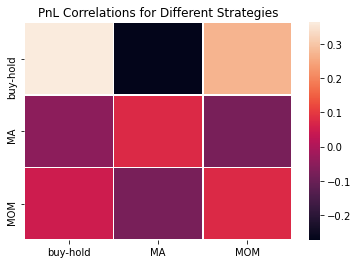

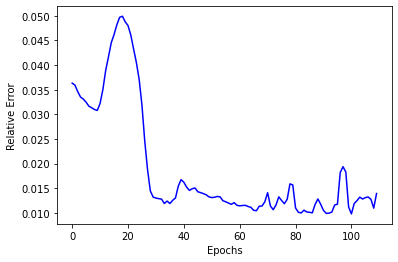

Discriminator Loss: -0.00004420 Generator Loss: -0.00253247:   1%|▏              | 114/10000 [05:07<7:02:09,  2.56s/it]

current fake and real ves and funres:  tensor([ 0.0386, -0.0158], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0383, -0.0158], device='cuda:0', grad_fn=<SelectBackward0>)


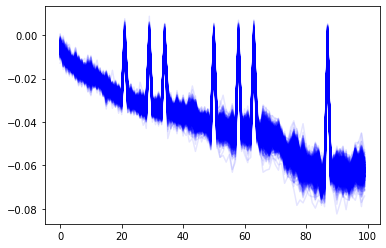

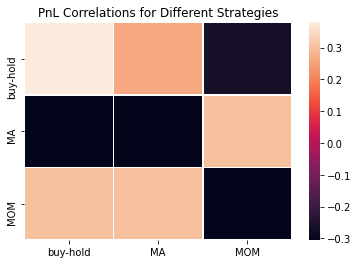

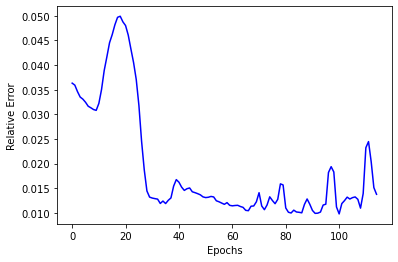

Discriminator Loss: -0.00002414 Generator Loss: -0.00257669:   1%|▏              | 117/10000 [05:16<7:25:44,  2.71s/it]


KeyboardInterrupt: 

In [7]:
train = True
# batch*pnl
signal = 8e-3
lookback = 15
trade_strategy_1 = TradingStrategy("buy-hold",lookback,(0,0),(signal,signal))
trade_strategy_2 = TradingStrategy("MA",lookback,(0,0),(signal,signal))
trade_strategy_3 = TradingStrategy("MOM",lookback,(0,0),(signal,signal))
trade_strategy_lst = [trade_strategy_1,trade_strategy_2,trade_strategy_3]
mse_loss = torch.nn.MSELoss()
re_lst = []
if train:

#     dataset = PriceScenarioDataset(lo30_data,pnl_size, 1,True)
#     dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size)
#     dataset = Loader32(log_returns_preprocessed, 1)
#     dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size)
    c=0
    t = tqdm(range(10000))
    for epoch in t:
        for idx, data in enumerate(dataloader, 0):
            generator.train()
            discriminator.train()
#             print(data.shape)
            c+=1
#             print(idx,epoch)
            if True: #(idx<=10 and epoch ==0) or epoch!=0:
                discriminator.zero_grad()
#                 print(data)
                ps_real = data#.permute(0,2,1).squeeze(-1)
    #             score_real = data[-1].reshape(batch_size,-1)

                ps_fake = generator(mean=0, std=1).reshape(batch_size,-1).detach()
                
                disc_loss = 0
                ve_loss = 0
                for trade_strategy in trade_strategy_lst:

                    ts_real = trade_strategy.get_strategy_PnL(ps_real)#,torch.ones_like(ps_real))
                    ts_fake = trade_strategy.get_strategy_PnL(ps_fake)#,torch.ones_like(ps_fake))

                    fake_ve = discriminator(ts_fake)
                    fake_v,fake_e = fake_ve[:,0],fake_ve[:,1]
                    real_ve = discriminator(ts_real)
                    real_v,real_e = real_ve[:,0],real_ve[:,1]
#                     if idx % 180 == 0:
#                         print("disc:current fake and real ves: ",fake_ve[0],real_ve[0])


                    disc_loss -= torch.mean(score(fake_v,fake_e,ts_real,0.05)) - \
                                          torch.mean(score(real_v,real_e,ts_real,0.05))
    
                    
#                     real_v_funres = VaR(0.05,ts_real)
#                     real_e_funres = ES(0.05,ts_real)
#                     ve_loss += mse_loss(real_v,real_v_funres)
#                     ve_loss += mse_loss(real_e,real_e_funres)
#                     fake_v_funres = VaR(0.05,ts_fake)
#                     fake_e_funres = ES(0.05,ts_fake)
#                     ve_loss += mse_loss(fake_v,fake_v_funres)
#                     ve_loss += mse_loss(fake_e,fake_e_funres)
     

    #             print('Discriminator Loss: %.8f' % (disc_loss.item()))
                disc_loss/=len(trade_strategy_lst)
#                 ve_loss/=len(trade_strategy_lst)*4
#                 disc_loss+=ve_loss
                disc_loss.backward()

                disc_optimizer.step()
#                 scheduler_disc.step()
            

#             discriminator.zero_grad()
#             real = data.to(device)
#             batch_size, seq_len = real.size(0), real.size(1)
#             noise = torch.randn(batch_size, nz, seq_len, device=device)
#             fake = generator(noise).detach()
#             disc_loss = -torch.mean(discriminator(real)) + torch.mean(discriminator(fake))
#             disc_loss.backward()
#             disc_optimizer.step()

#             for dp in discriminator.parameters():
#                 dp.data.clamp_(-clip, clip)
    
            if True: #not (idx<=10 and epoch ==0):# or idx % 2 == 0:
                for _ in range(1):
                    generator.zero_grad()
                    discriminator.zero_grad()
                    ps_fake = generator(mean=0, std=1).reshape(batch_size,-1)
                    gen_loss = 0
                    for trade_strategy in trade_strategy_lst:
                        ts_real = trade_strategy.get_strategy_PnL(ps_real)
                        ts_fake = trade_strategy.get_strategy_PnL(ps_fake)
                        fake_ve = discriminator(ts_fake)
                        fake_v,fake_e = fake_ve[:,0],fake_ve[:,1]

        #                 print(fake_ve[0],"asdsa")

                        gen_loss += torch.mean(score(fake_v,fake_e,ts_real,0.05))

    #                 gen_loss = -torch.mean(discriminator(generator(noise)))
                    gen_loss/=len(trade_strategy_lst)
                    gen_loss.backward()
                    gen_optimizer.step()
#                     scheduler_gen.step()
#                 if idx % 180 == 0:
#                     print("gen:current fake ve: ",fake_ve[0])

        re=0
        for trade_strategy in trade_strategy_lst:
            ts_real = trade_strategy.get_strategy_PnL(ps_real)#,torch.ones_like(ps_real))
            ts_fake = trade_strategy.get_strategy_PnL(ps_fake)#,torch.ones_like(ps_fake))

            fake_ve = discriminator(ts_fake)
            fake_v,fake_e = fake_ve[:,0],fake_ve[:,1]
            real_ve = discriminator(ts_real)
            real_v,real_e = real_ve[:,0],real_ve[:,1]

            re += torch.mean(torch.abs(fake_v-real_v)/torch.abs(real_v)) + torch.mean(torch.abs(fake_e-real_e)/torch.abs(real_e))
        re/=(len(trade_strategy_lst)*2)

        re_lst.append(re.cpu().detach().numpy())
                    
        if (epoch+1)%5==0:
            generator.eval()
            discriminator.eval()
            print("current fake and real ves and funres: ",fake_ve[0],real_ve[0])#,real_v_funres[0],real_e_funres[0])
            for _ in range(1):
                ps_fake = generator(mean=0, std=1).reshape(batch_size,-1).detach().cpu()
                for i in range(len(ps_fake)):
                    plt.plot(list(range(100)),ps_fake[i],color = "blue", alpha=0.1)
            plt.show()
            
            
            labels = ["buy-hold","MA","MOM"]
#                 ps_fake = generator(mean=0, std=1).reshape(batch_size,-1).detach().cuda()
#                 ps_real = next(iter(dataloader))
            ps_fake = generator(mean=0, std=1).reshape(batch_size,-1).detach().cuda()
            ts_real_lst = []
            ts_fake_lst = []
            heat_map = []
            for trade_strategy in trade_strategy_lst:
                ts_real = trade_strategy.get_strategy_PnL(ps_real)
                ts_fake = trade_strategy.get_strategy_PnL(ps_fake)
                ts_real = torch.mean(ts_real,axis = 0)
                ts_fake = torch.mean(ts_fake,axis = 0)
                ts_real_lst.append(ts_real.cpu())
                ts_fake_lst.append(ts_fake.cpu())
            for m in range(len(trade_strategy_lst)):
                temp_heatmap = []
                for n in range(len(trade_strategy_lst)):
                    temp_heatmap.append(np.corrcoef(ts_real_lst[m],ts_fake_lst[n])[0,1])
                heat_map.append(temp_heatmap)
#                 print(model_name,heat_map)
            #plt.imshow(heat_map, cmap='hot', interpolation='nearest')
            ax = sns.heatmap(heat_map, linewidth=0.5)
        #     ax.set_xticks(np.arange(3))
        #     ax.set_yticks(np.arange(3))
            ax.set_xticklabels(labels)
            ax.set_yticklabels(labels)
            ax.set_title("PnL Correlations for Different Strategies")
            plt.show()
        
            plt.plot(list(range(len(re_lst))),re_lst,color = "blue")
            plt.xlabel('Epochs')
            plt.ylabel('Relative Error')
            plt.show()
            
            torch.save(generator, f"trained_generator_epoch_{epoch}.pth")
        t.set_description('Discriminator Loss: %.8f Generator Loss: %.8f' % (disc_loss.item(), gen_loss.item()))
            
        # Save

else:
    # Load
    generator = torch.load(f'{generator_path}trained_generator_{file_name}_epoch_{num_epochs-1}.pth')
    generator.eval()

Discriminator Loss: 0.00002803 Generator Loss: -0.00078139:   1%|▏                    | 9/1000 [00:22<39:19,  2.38s/it]

current fake and real ves and funres:  tensor([ 0.0235, -0.0236], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0247, -0.0234], device='cuda:0', grad_fn=<SelectBackward0>)


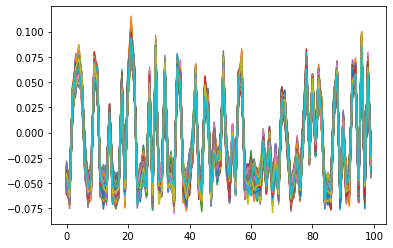

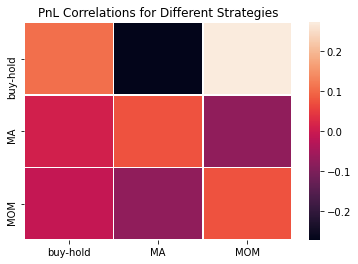

Discriminator Loss: 0.00020152 Generator Loss: -0.00092742:   2%|▍                   | 19/1000 [00:47<39:11,  2.40s/it]

current fake and real ves and funres:  tensor([ 0.0153, -0.0268], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0247, -0.0232], device='cuda:0', grad_fn=<SelectBackward0>)


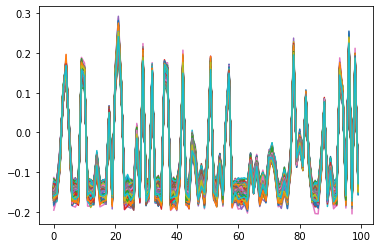

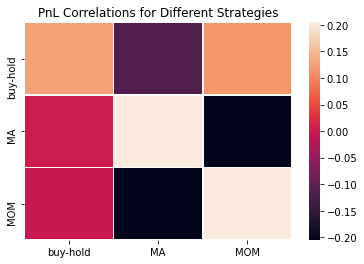

Discriminator Loss: -0.00027510 Generator Loss: -0.00057011:   3%|▌                  | 29/1000 [01:12<37:52,  2.34s/it]

current fake and real ves and funres:  tensor([ 0.0106, -0.0284], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0261, -0.0235], device='cuda:0', grad_fn=<SelectBackward0>)


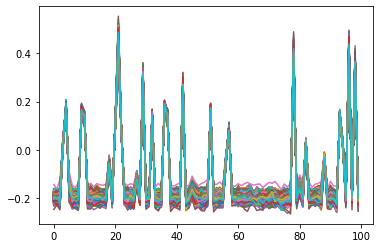

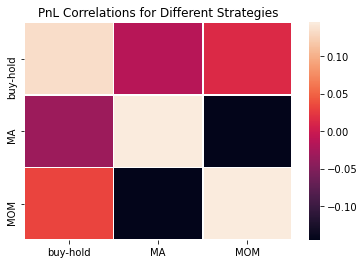

Discriminator Loss: -0.00055960 Generator Loss: -0.00052750:   4%|▋                  | 39/1000 [01:37<38:16,  2.39s/it]

current fake and real ves and funres:  tensor([ 0.0202, -0.0255], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0283, -0.0243], device='cuda:0', grad_fn=<SelectBackward0>)


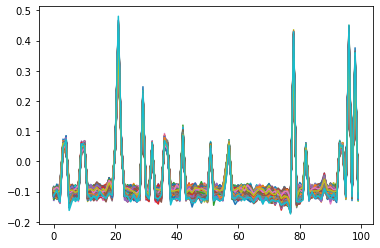

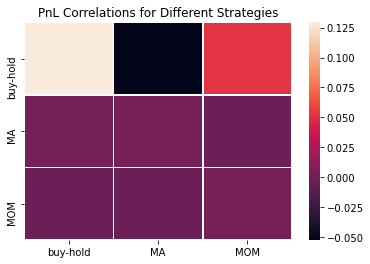

Discriminator Loss: -0.00012350 Generator Loss: -0.00114351:   5%|▉                  | 49/1000 [02:02<38:00,  2.40s/it]

current fake and real ves and funres:  tensor([ 0.0280, -0.0246], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0276, -0.0245], device='cuda:0', grad_fn=<SelectBackward0>)


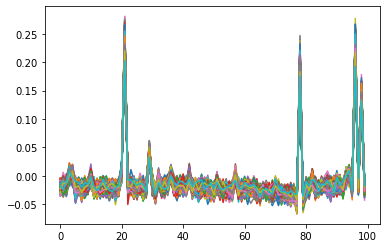

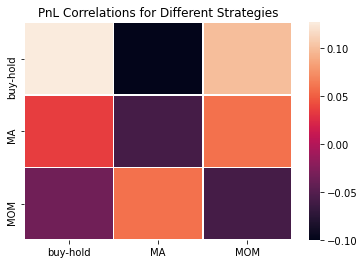

Discriminator Loss: 0.00004316 Generator Loss: -0.00125950:   6%|█▏                  | 59/1000 [02:27<36:51,  2.35s/it]

current fake and real ves and funres:  tensor([ 0.0289, -0.0244], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0286, -0.0243], device='cuda:0', grad_fn=<SelectBackward0>)


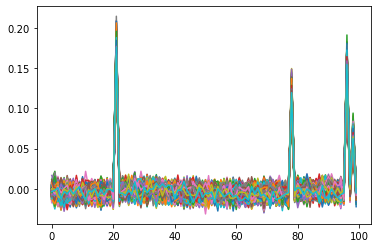

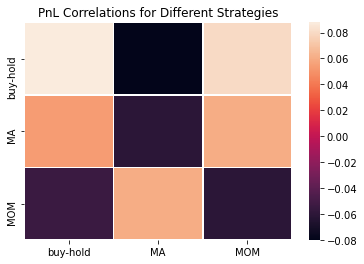

Discriminator Loss: -0.00000084 Generator Loss: -0.00122496:   7%|█▎                 | 69/1000 [02:52<36:09,  2.33s/it]

current fake and real ves and funres:  tensor([ 0.0284, -0.0242], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0283, -0.0242], device='cuda:0', grad_fn=<SelectBackward0>)


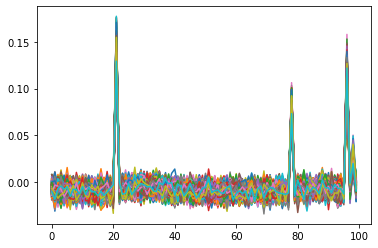

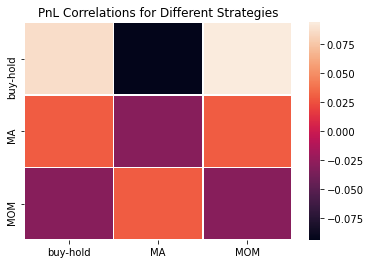

Discriminator Loss: -0.00001574 Generator Loss: -0.00123738:   8%|█▌                 | 79/1000 [03:17<37:16,  2.43s/it]

current fake and real ves and funres:  tensor([ 0.0279, -0.0240], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0284, -0.0241], device='cuda:0', grad_fn=<SelectBackward0>)


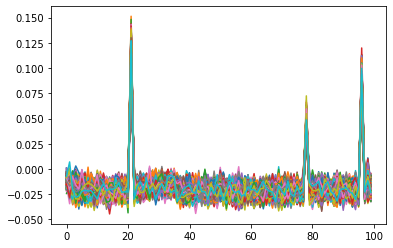

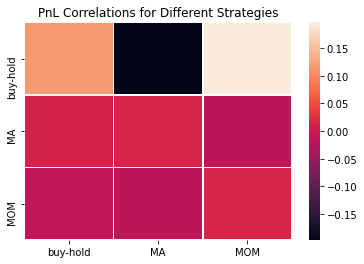

Discriminator Loss: 0.00001545 Generator Loss: -0.00124951:   9%|█▊                  | 89/1000 [03:42<36:10,  2.38s/it]

current fake and real ves and funres:  tensor([ 0.0273, -0.0238], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0269, -0.0239], device='cuda:0', grad_fn=<SelectBackward0>)


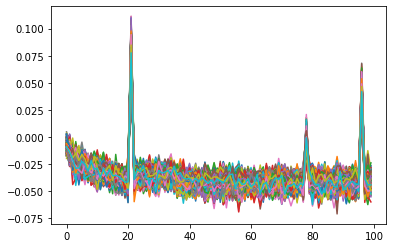

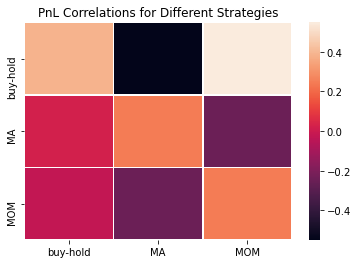

Discriminator Loss: 0.00002563 Generator Loss: -0.00123902:  10%|█▉                  | 99/1000 [04:07<35:26,  2.36s/it]

current fake and real ves and funres:  tensor([ 0.0273, -0.0238], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0274, -0.0239], device='cuda:0', grad_fn=<SelectBackward0>)


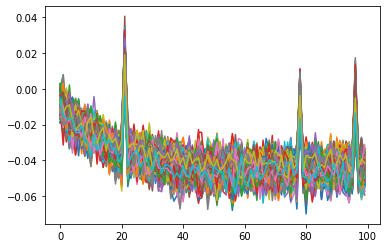

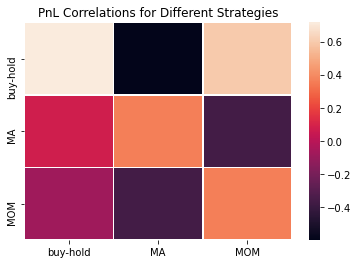

Discriminator Loss: 0.00002428 Generator Loss: -0.00119236:  11%|██                 | 109/1000 [04:31<34:55,  2.35s/it]

current fake and real ves and funres:  tensor([ 0.0277, -0.0240], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0278, -0.0240], device='cuda:0', grad_fn=<SelectBackward0>)


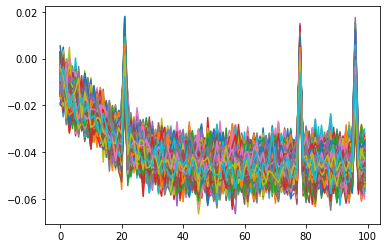

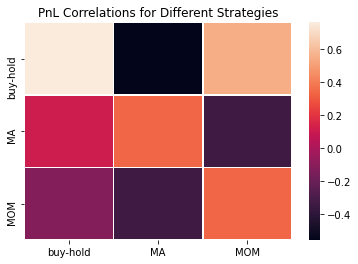

Discriminator Loss: 0.00001904 Generator Loss: -0.00117990:  12%|██▎                | 119/1000 [04:57<35:18,  2.41s/it]

current fake and real ves and funres:  tensor([ 0.0274, -0.0241], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0269, -0.0240], device='cuda:0', grad_fn=<SelectBackward0>)


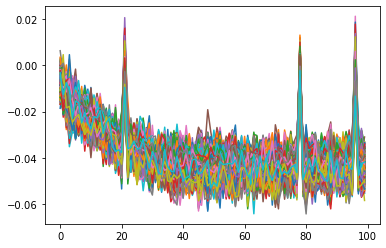

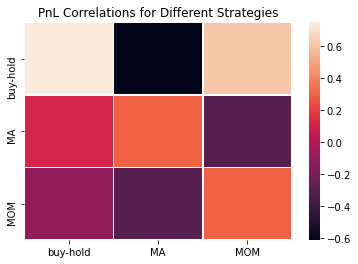

Discriminator Loss: 0.00001353 Generator Loss: -0.00112888:  13%|██▍                | 129/1000 [05:21<33:56,  2.34s/it]

current fake and real ves and funres:  tensor([ 0.0274, -0.0241], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0271, -0.0240], device='cuda:0', grad_fn=<SelectBackward0>)


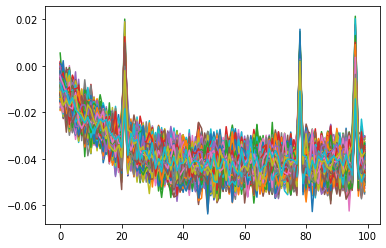

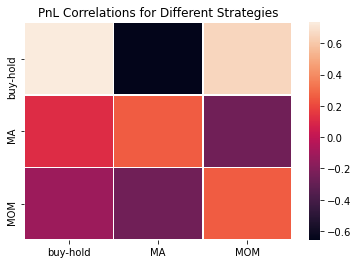

Discriminator Loss: 0.00000239 Generator Loss: -0.00110556:  14%|██▋                | 139/1000 [05:46<33:51,  2.36s/it]

current fake and real ves and funres:  tensor([ 0.0273, -0.0239], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0274, -0.0239], device='cuda:0', grad_fn=<SelectBackward0>)


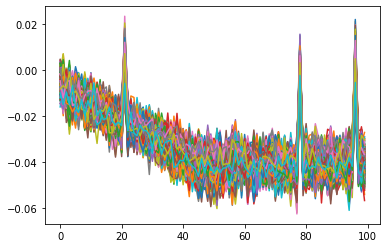

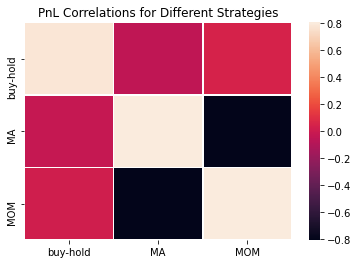

Discriminator Loss: -0.00000361 Generator Loss: -0.00110664:  15%|██▋               | 149/1000 [06:11<33:29,  2.36s/it]

current fake and real ves and funres:  tensor([ 0.0272, -0.0239], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0275, -0.0240], device='cuda:0', grad_fn=<SelectBackward0>)


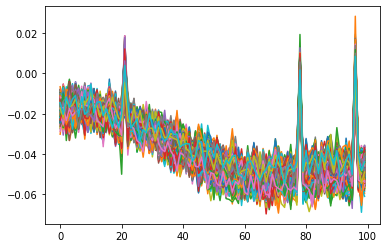

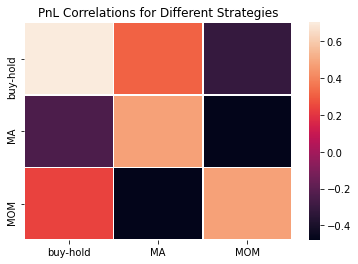

Discriminator Loss: -0.00000588 Generator Loss: -0.00111960:  16%|██▊               | 159/1000 [06:37<33:41,  2.40s/it]

current fake and real ves and funres:  tensor([ 0.0270, -0.0238], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0270, -0.0239], device='cuda:0', grad_fn=<SelectBackward0>)


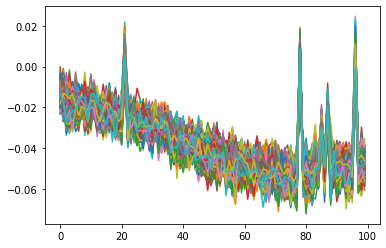

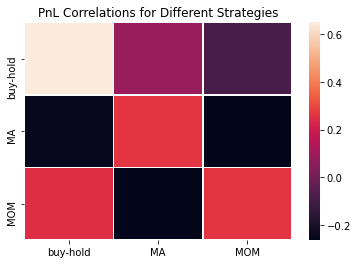

Discriminator Loss: 0.00000274 Generator Loss: -0.00112891:  17%|███▏               | 169/1000 [07:01<32:58,  2.38s/it]

current fake and real ves and funres:  tensor([ 0.0273, -0.0239], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0271, -0.0238], device='cuda:0', grad_fn=<SelectBackward0>)


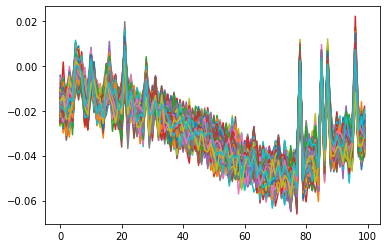

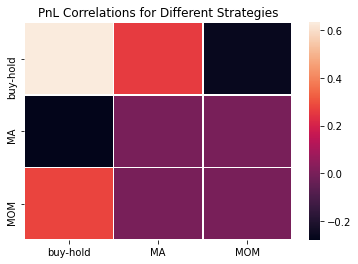

Discriminator Loss: 0.00000088 Generator Loss: -0.00106514:  18%|███▍               | 179/1000 [07:26<32:15,  2.36s/it]

current fake and real ves and funres:  tensor([ 0.0267, -0.0238], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0267, -0.0238], device='cuda:0', grad_fn=<SelectBackward0>)


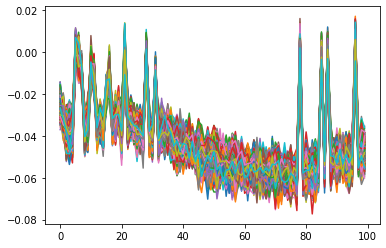

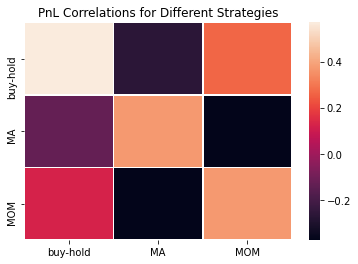

Discriminator Loss: -0.00000422 Generator Loss: -0.00110384:  19%|███▍              | 189/1000 [07:51<32:05,  2.37s/it]

current fake and real ves and funres:  tensor([ 0.0268, -0.0237], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0263, -0.0238], device='cuda:0', grad_fn=<SelectBackward0>)


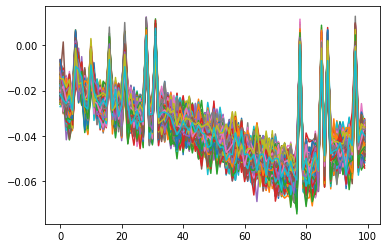

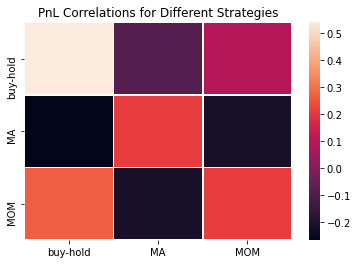

Discriminator Loss: -0.00000158 Generator Loss: -0.00103944:  20%|███▌              | 199/1000 [08:15<30:54,  2.32s/it]

current fake and real ves and funres:  tensor([ 0.0267, -0.0238], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0266, -0.0238], device='cuda:0', grad_fn=<SelectBackward0>)


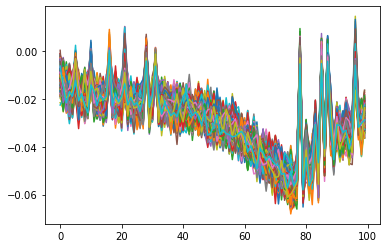

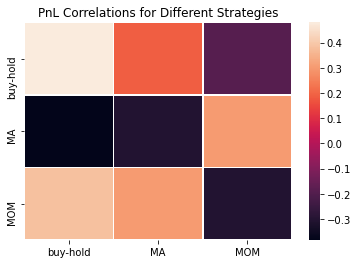

Discriminator Loss: 0.00000129 Generator Loss: -0.00110375:  21%|███▉               | 209/1000 [08:40<30:28,  2.31s/it]

current fake and real ves and funres:  tensor([ 0.0272, -0.0239], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0261, -0.0238], device='cuda:0', grad_fn=<SelectBackward0>)


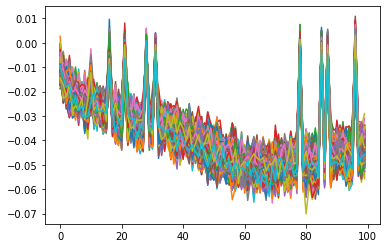

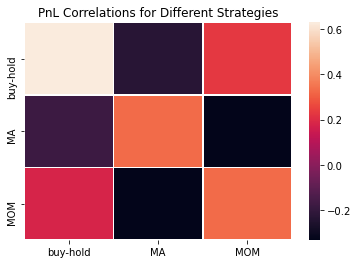

Discriminator Loss: -0.00000221 Generator Loss: -0.00107163:  22%|███▉              | 219/1000 [09:04<30:14,  2.32s/it]

current fake and real ves and funres:  tensor([ 0.0270, -0.0238], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0267, -0.0237], device='cuda:0', grad_fn=<SelectBackward0>)


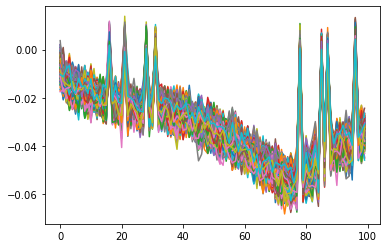

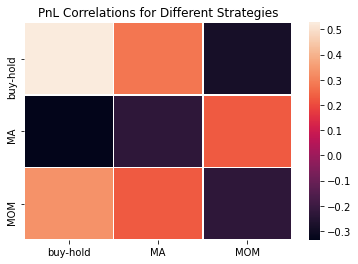

Discriminator Loss: 0.00000146 Generator Loss: -0.00106480:  23%|████▎              | 229/1000 [09:30<32:47,  2.55s/it]

current fake and real ves and funres:  tensor([ 0.0267, -0.0238], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0274, -0.0240], device='cuda:0', grad_fn=<SelectBackward0>)


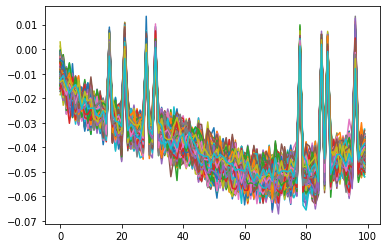

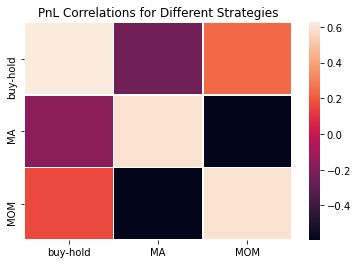

Discriminator Loss: -0.00000479 Generator Loss: -0.00104750:  24%|████▎             | 239/1000 [09:55<30:47,  2.43s/it]

current fake and real ves and funres:  tensor([ 0.0266, -0.0237], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0265, -0.0237], device='cuda:0', grad_fn=<SelectBackward0>)


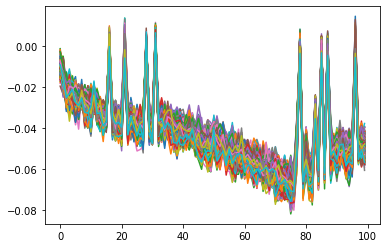

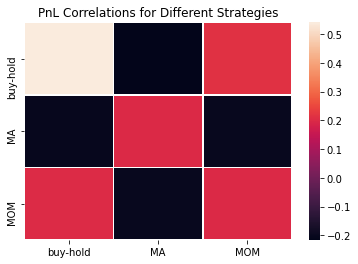

Discriminator Loss: 0.00000027 Generator Loss: -0.00113230:  25%|████▋              | 249/1000 [10:21<30:40,  2.45s/it]

current fake and real ves and funres:  tensor([ 0.0273, -0.0240], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0271, -0.0240], device='cuda:0', grad_fn=<SelectBackward0>)


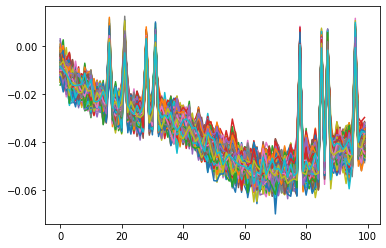

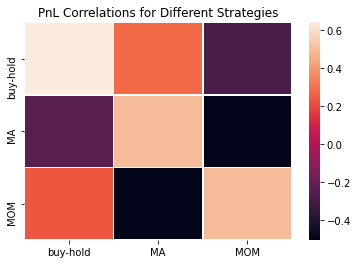

Discriminator Loss: -0.00001650 Generator Loss: -0.00108598:  26%|████▋             | 259/1000 [10:46<29:08,  2.36s/it]

current fake and real ves and funres:  tensor([ 0.0263, -0.0240], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0274, -0.0240], device='cuda:0', grad_fn=<SelectBackward0>)


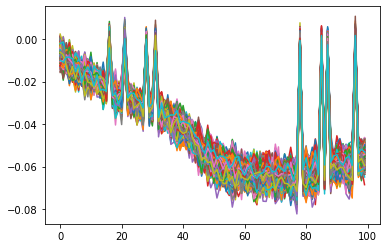

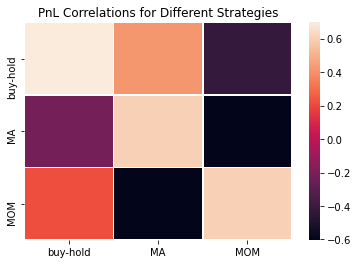

Discriminator Loss: 0.00000194 Generator Loss: -0.00115022:  27%|█████              | 269/1000 [11:11<28:38,  2.35s/it]

current fake and real ves and funres:  tensor([ 0.0276, -0.0242], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0261, -0.0241], device='cuda:0', grad_fn=<SelectBackward0>)


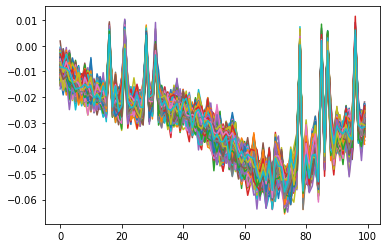

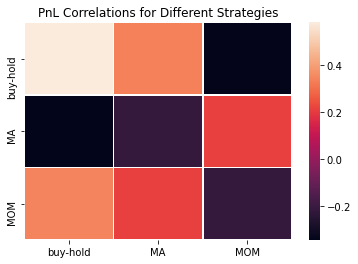

Discriminator Loss: -0.00001463 Generator Loss: -0.00113368:  28%|█████             | 279/1000 [11:36<28:23,  2.36s/it]

current fake and real ves and funres:  tensor([ 0.0263, -0.0239], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0269, -0.0239], device='cuda:0', grad_fn=<SelectBackward0>)


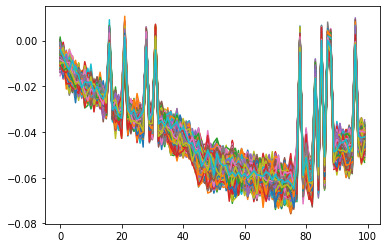

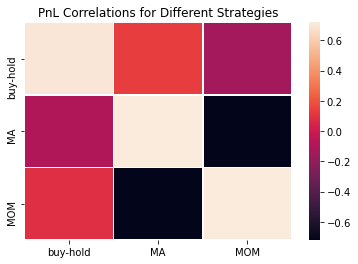

Discriminator Loss: 0.00000149 Generator Loss: -0.00114776:  29%|█████▍             | 289/1000 [12:01<28:12,  2.38s/it]

current fake and real ves and funres:  tensor([ 0.0271, -0.0240], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0278, -0.0242], device='cuda:0', grad_fn=<SelectBackward0>)


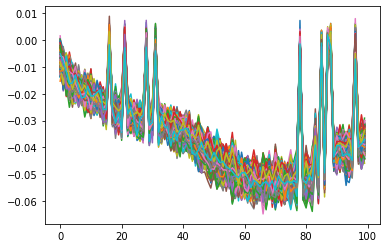

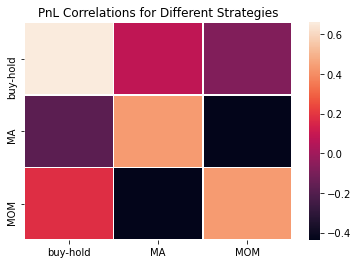

Discriminator Loss: -0.00001551 Generator Loss: -0.00114546:  30%|█████▍            | 299/1000 [12:26<27:41,  2.37s/it]

current fake and real ves and funres:  tensor([ 0.0268, -0.0241], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0260, -0.0242], device='cuda:0', grad_fn=<SelectBackward0>)


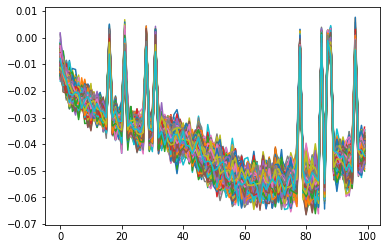

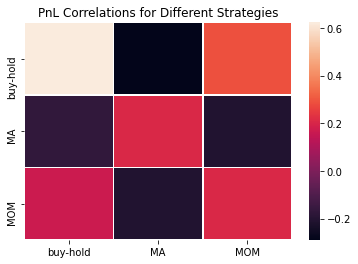

Discriminator Loss: -0.00000770 Generator Loss: -0.00109077:  31%|█████▌            | 309/1000 [12:51<27:13,  2.36s/it]

current fake and real ves and funres:  tensor([ 0.0271, -0.0240], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0271, -0.0240], device='cuda:0', grad_fn=<SelectBackward0>)


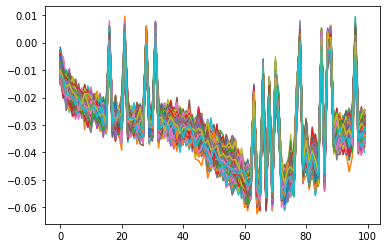

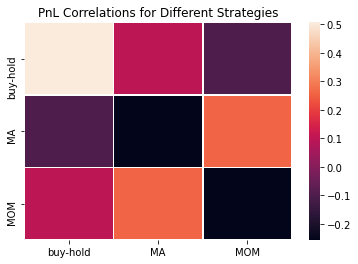

Discriminator Loss: -0.00003762 Generator Loss: -0.00120269:  32%|█████▋            | 319/1000 [13:16<26:49,  2.36s/it]

current fake and real ves and funres:  tensor([ 0.0268, -0.0241], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0281, -0.0243], device='cuda:0', grad_fn=<SelectBackward0>)


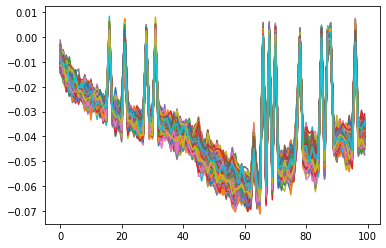

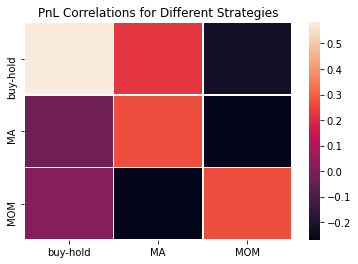

Discriminator Loss: -0.00000153 Generator Loss: -0.00138416:  33%|█████▉            | 329/1000 [13:41<26:23,  2.36s/it]

current fake and real ves and funres:  tensor([ 0.0274, -0.0243], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0275, -0.0243], device='cuda:0', grad_fn=<SelectBackward0>)


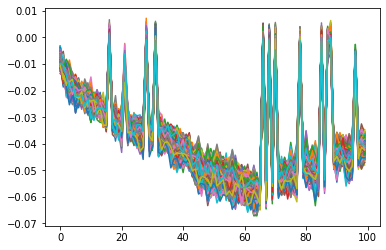

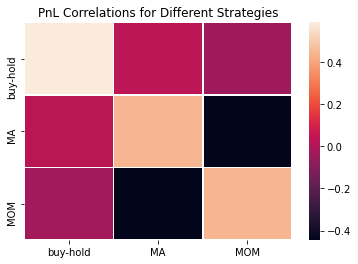

Discriminator Loss: 0.00001260 Generator Loss: -0.00144785:  34%|██████▍            | 339/1000 [14:06<26:04,  2.37s/it]

current fake and real ves and funres:  tensor([ 0.0290, -0.0248], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0275, -0.0246], device='cuda:0', grad_fn=<SelectBackward0>)


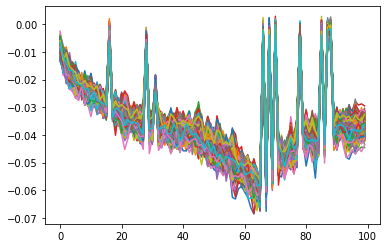

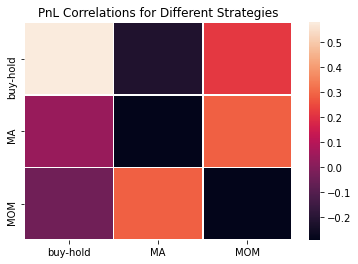

Discriminator Loss: 0.00001826 Generator Loss: -0.00141503:  35%|██████▋            | 349/1000 [14:31<26:09,  2.41s/it]

current fake and real ves and funres:  tensor([ 0.0294, -0.0251], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0286, -0.0249], device='cuda:0', grad_fn=<SelectBackward0>)


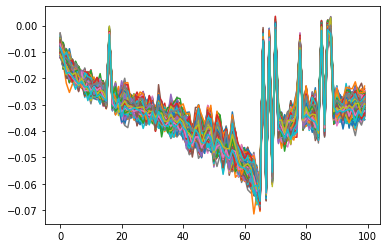

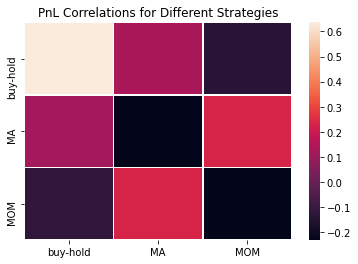

Discriminator Loss: -0.00001496 Generator Loss: -0.00138640:  36%|██████▍           | 359/1000 [14:56<25:21,  2.37s/it]

current fake and real ves and funres:  tensor([ 0.0278, -0.0246], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0288, -0.0248], device='cuda:0', grad_fn=<SelectBackward0>)


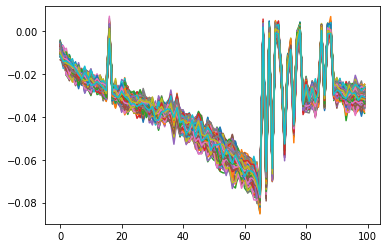

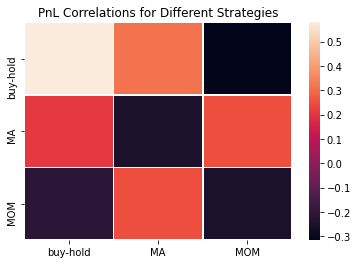

Discriminator Loss: -0.00002821 Generator Loss: -0.00152100:  37%|██████▋           | 369/1000 [15:21<24:53,  2.37s/it]

current fake and real ves and funres:  tensor([ 0.0292, -0.0250], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0298, -0.0251], device='cuda:0', grad_fn=<SelectBackward0>)


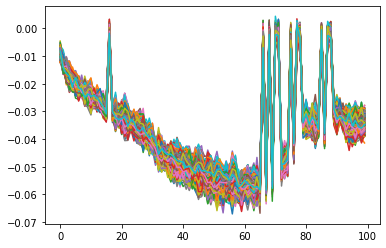

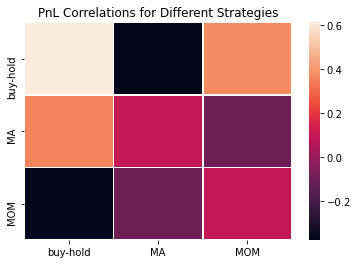

Discriminator Loss: -0.00003792 Generator Loss: -0.00153273:  38%|██████▊           | 379/1000 [15:46<24:53,  2.40s/it]

current fake and real ves and funres:  tensor([ 0.0268, -0.0249], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0295, -0.0253], device='cuda:0', grad_fn=<SelectBackward0>)


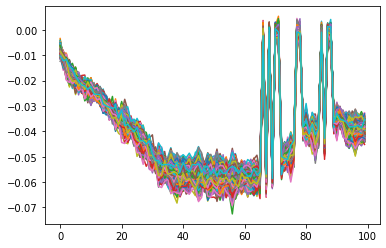

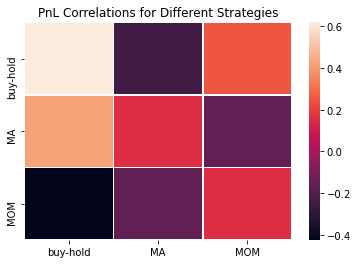

Discriminator Loss: 0.00002927 Generator Loss: -0.00159725:  39%|███████▍           | 389/1000 [16:11<24:06,  2.37s/it]

current fake and real ves and funres:  tensor([ 0.0300, -0.0254], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0301, -0.0254], device='cuda:0', grad_fn=<SelectBackward0>)


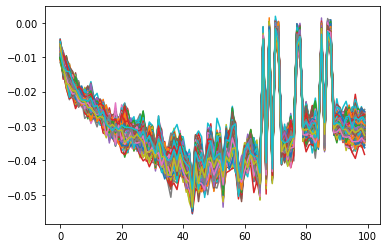

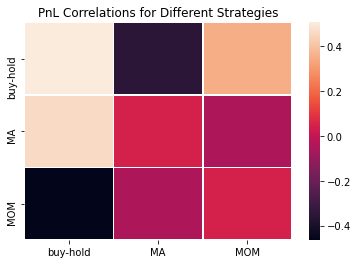

Discriminator Loss: -0.00009273 Generator Loss: -0.00152796:  40%|███████▏          | 399/1000 [16:36<23:42,  2.37s/it]

current fake and real ves and funres:  tensor([ 0.0279, -0.0252], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0305, -0.0255], device='cuda:0', grad_fn=<SelectBackward0>)


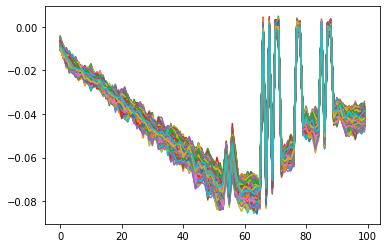

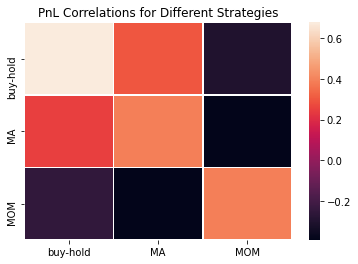

Discriminator Loss: 0.00002854 Generator Loss: -0.00167717:  41%|███████▊           | 409/1000 [17:01<23:19,  2.37s/it]

current fake and real ves and funres:  tensor([ 0.0306, -0.0258], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0284, -0.0255], device='cuda:0', grad_fn=<SelectBackward0>)


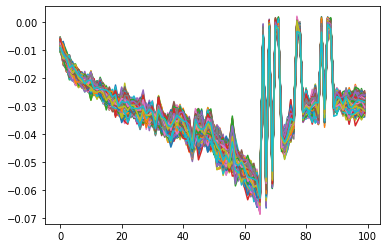

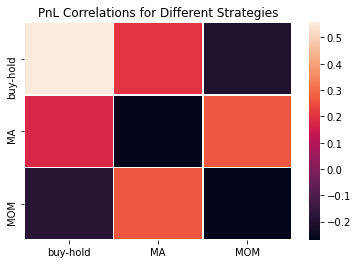

Discriminator Loss: -0.00000013 Generator Loss: -0.00161996:  42%|███████▌          | 419/1000 [17:26<22:56,  2.37s/it]

current fake and real ves and funres:  tensor([ 0.0298, -0.0256], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0297, -0.0255], device='cuda:0', grad_fn=<SelectBackward0>)


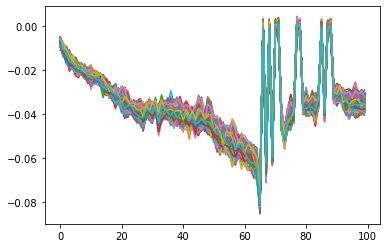

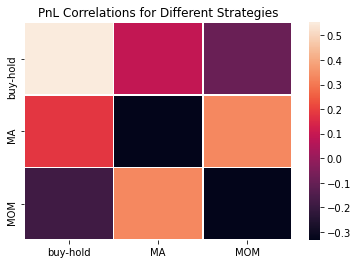

Discriminator Loss: -0.00001071 Generator Loss: -0.00169160:  43%|███████▋          | 429/1000 [17:51<22:45,  2.39s/it]

current fake and real ves and funres:  tensor([ 0.0311, -0.0260], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0303, -0.0258], device='cuda:0', grad_fn=<SelectBackward0>)


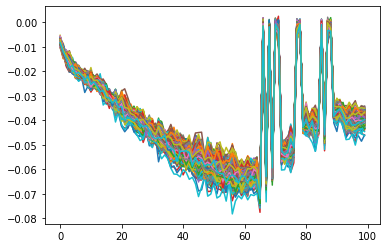

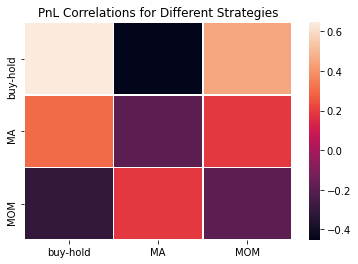

Discriminator Loss: 0.00001578 Generator Loss: -0.00163661:  44%|████████▎          | 439/1000 [18:17<22:48,  2.44s/it]

current fake and real ves and funres:  tensor([ 0.0304, -0.0260], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0304, -0.0259], device='cuda:0', grad_fn=<SelectBackward0>)


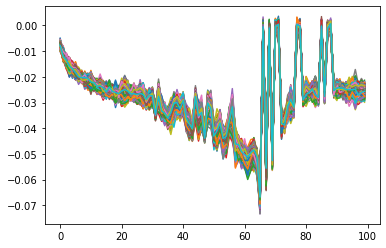

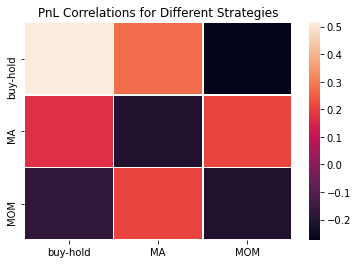

Discriminator Loss: -0.00010301 Generator Loss: -0.00160243:  45%|████████          | 449/1000 [18:42<21:47,  2.37s/it]

current fake and real ves and funres:  tensor([ 0.0279, -0.0255], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0292, -0.0256], device='cuda:0', grad_fn=<SelectBackward0>)


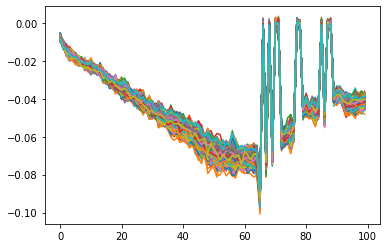

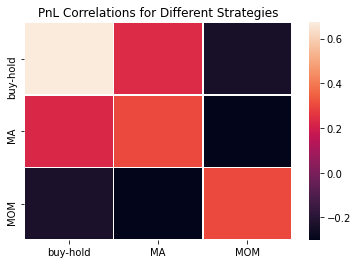

Discriminator Loss: 0.00002996 Generator Loss: -0.00178753:  46%|████████▋          | 459/1000 [19:06<21:27,  2.38s/it]

current fake and real ves and funres:  tensor([ 0.0313, -0.0262], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0293, -0.0257], device='cuda:0', grad_fn=<SelectBackward0>)


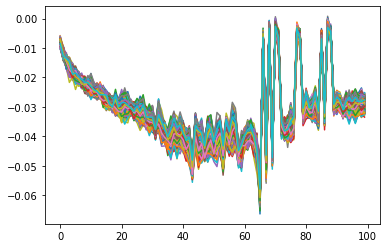

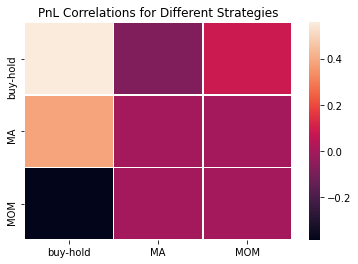

Discriminator Loss: -0.00001675 Generator Loss: -0.00174802:  47%|████████▍         | 469/1000 [19:31<21:00,  2.37s/it]

current fake and real ves and funres:  tensor([ 0.0302, -0.0257], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0304, -0.0259], device='cuda:0', grad_fn=<SelectBackward0>)


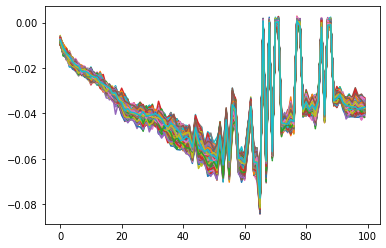

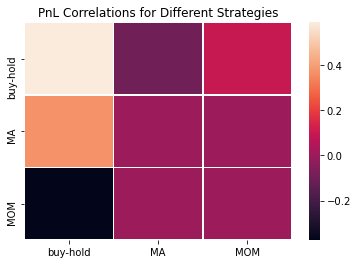

Discriminator Loss: -0.00001066 Generator Loss: -0.00181991:  48%|████████▌         | 479/1000 [19:56<20:48,  2.40s/it]

current fake and real ves and funres:  tensor([ 0.0308, -0.0261], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0305, -0.0261], device='cuda:0', grad_fn=<SelectBackward0>)


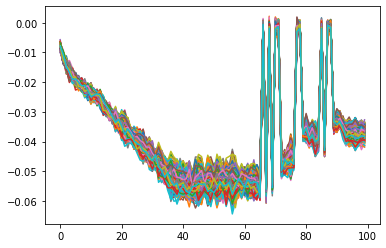

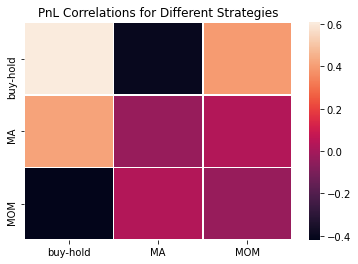

Discriminator Loss: 0.00000666 Generator Loss: -0.00183544:  49%|█████████▎         | 489/1000 [20:21<20:25,  2.40s/it]

current fake and real ves and funres:  tensor([ 0.0312, -0.0266], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0312, -0.0265], device='cuda:0', grad_fn=<SelectBackward0>)


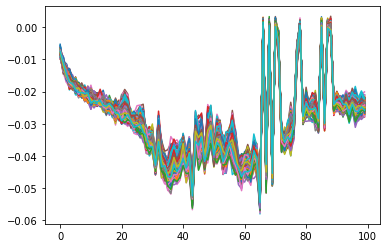

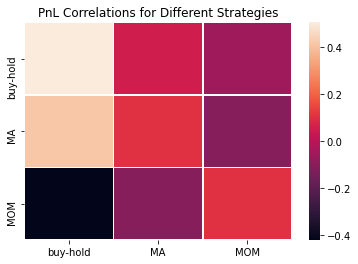

Discriminator Loss: -0.00004349 Generator Loss: -0.00181921:  50%|████████▉         | 499/1000 [20:46<19:59,  2.40s/it]

current fake and real ves and funres:  tensor([ 0.0295, -0.0260], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0316, -0.0265], device='cuda:0', grad_fn=<SelectBackward0>)


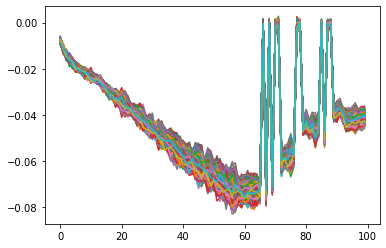

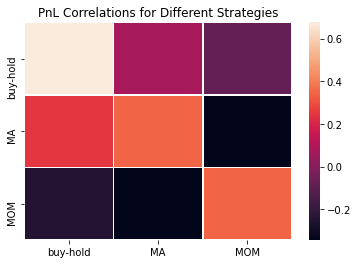

Discriminator Loss: 0.00002817 Generator Loss: -0.00189437:  51%|█████████▋         | 509/1000 [21:11<19:27,  2.38s/it]

current fake and real ves and funres:  tensor([ 0.0320, -0.0269], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0301, -0.0260], device='cuda:0', grad_fn=<SelectBackward0>)


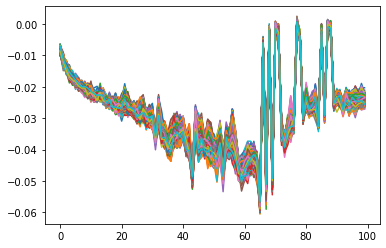

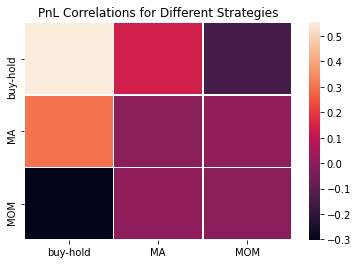

Discriminator Loss: -0.00001677 Generator Loss: -0.00183060:  52%|█████████▎        | 519/1000 [21:37<19:43,  2.46s/it]

current fake and real ves and funres:  tensor([ 0.0307, -0.0260], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0315, -0.0269], device='cuda:0', grad_fn=<SelectBackward0>)


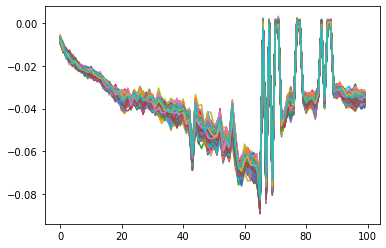

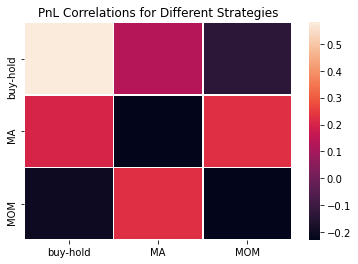

Discriminator Loss: -0.00002534 Generator Loss: -0.00198024:  53%|█████████▌        | 529/1000 [22:02<18:49,  2.40s/it]

current fake and real ves and funres:  tensor([ 0.0320, -0.0266], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0324, -0.0268], device='cuda:0', grad_fn=<SelectBackward0>)


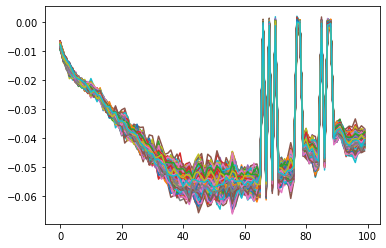

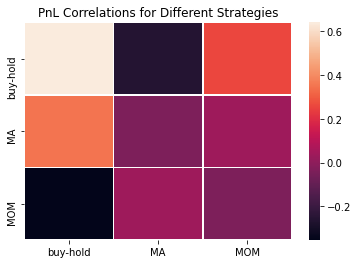

Discriminator Loss: 0.00002000 Generator Loss: -0.00197479:  54%|██████████▏        | 539/1000 [22:27<18:22,  2.39s/it]

current fake and real ves and funres:  tensor([ 0.0323, -0.0271], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0321, -0.0271], device='cuda:0', grad_fn=<SelectBackward0>)


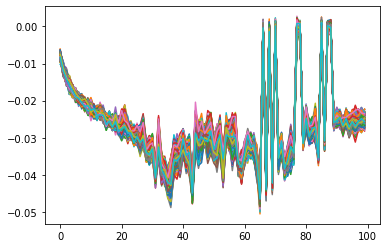

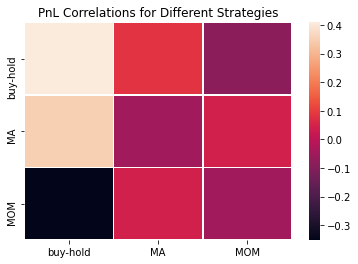

Discriminator Loss: -0.00005879 Generator Loss: -0.00194346:  55%|█████████▉        | 549/1000 [22:52<17:55,  2.38s/it]

current fake and real ves and funres:  tensor([ 0.0292, -0.0262], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0305, -0.0263], device='cuda:0', grad_fn=<SelectBackward0>)


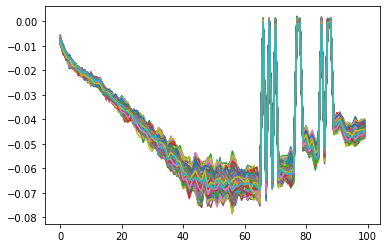

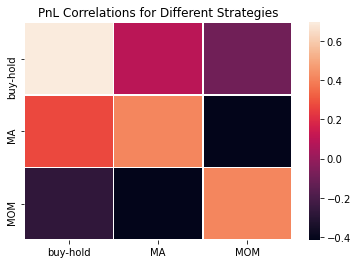

Discriminator Loss: -0.00000528 Generator Loss: -0.00217427:  56%|██████████        | 559/1000 [23:17<17:22,  2.36s/it]

current fake and real ves and funres:  tensor([ 0.0336, -0.0274], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0328, -0.0270], device='cuda:0', grad_fn=<SelectBackward0>)


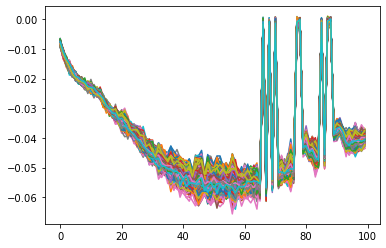

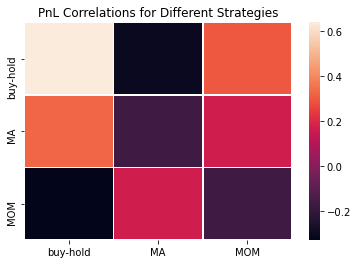

Discriminator Loss: 0.00000748 Generator Loss: -0.00210427:  57%|██████████▊        | 569/1000 [23:43<17:05,  2.38s/it]

current fake and real ves and funres:  tensor([ 0.0327, -0.0272], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0329, -0.0275], device='cuda:0', grad_fn=<SelectBackward0>)


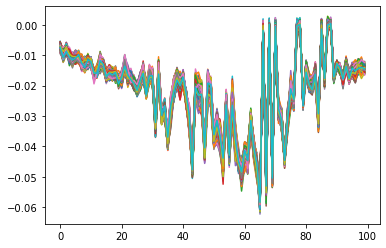

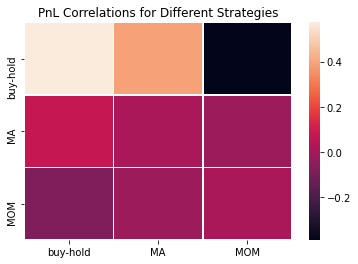

Discriminator Loss: -0.00002184 Generator Loss: -0.00208190:  58%|██████████▍       | 579/1000 [24:08<16:33,  2.36s/it]

current fake and real ves and funres:  tensor([ 0.0318, -0.0263], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0322, -0.0270], device='cuda:0', grad_fn=<SelectBackward0>)


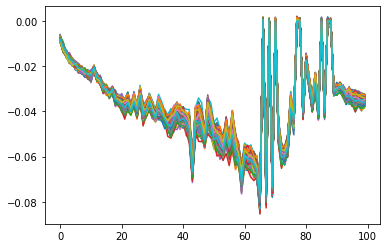

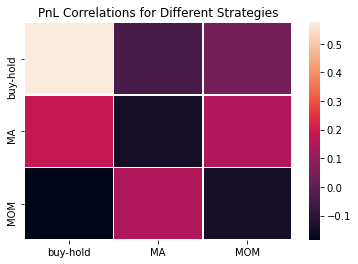

Discriminator Loss: -0.00003212 Generator Loss: -0.00223521:  59%|██████████▌       | 589/1000 [24:32<16:06,  2.35s/it]

current fake and real ves and funres:  tensor([ 0.0333, -0.0270], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0337, -0.0274], device='cuda:0', grad_fn=<SelectBackward0>)


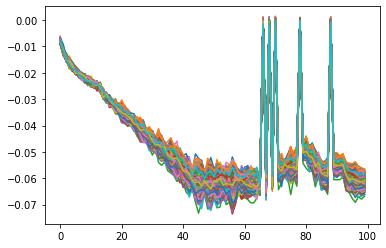

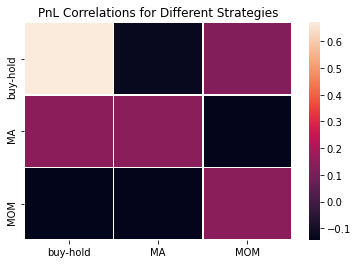

Discriminator Loss: 0.00001535 Generator Loss: -0.00227220:  60%|███████████▍       | 599/1000 [24:57<15:42,  2.35s/it]

current fake and real ves and funres:  tensor([ 0.0340, -0.0277], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0338, -0.0275], device='cuda:0', grad_fn=<SelectBackward0>)


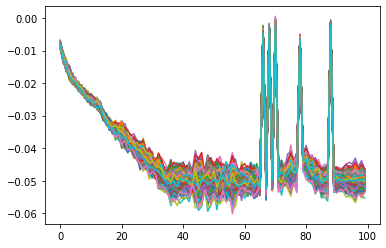

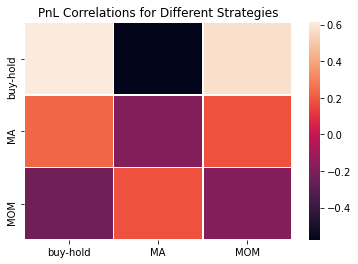

Discriminator Loss: 0.00001977 Generator Loss: -0.00220749:  61%|███████████▌       | 609/1000 [25:22<15:16,  2.34s/it]

current fake and real ves and funres:  tensor([ 0.0335, -0.0279], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0335, -0.0279], device='cuda:0', grad_fn=<SelectBackward0>)


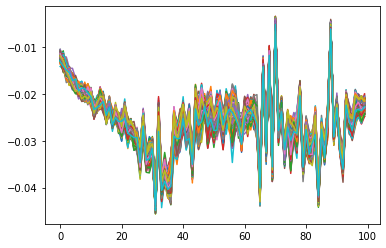

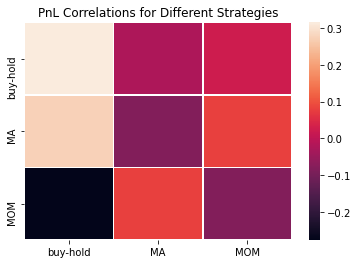

Discriminator Loss: -0.00002334 Generator Loss: -0.00215041:  62%|███████████▏      | 619/1000 [25:46<15:07,  2.38s/it]

current fake and real ves and funres:  tensor([ 0.0322, -0.0269], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0328, -0.0275], device='cuda:0', grad_fn=<SelectBackward0>)


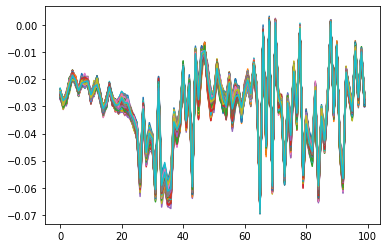

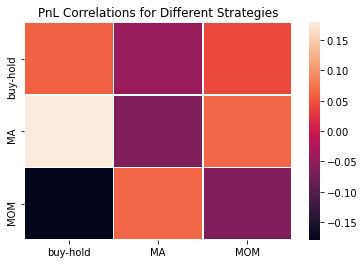

Discriminator Loss: -0.00001220 Generator Loss: -0.00219039:  63%|███████████▎      | 629/1000 [26:11<14:33,  2.35s/it]

current fake and real ves and funres:  tensor([ 0.0322, -0.0265], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0316, -0.0263], device='cuda:0', grad_fn=<SelectBackward0>)


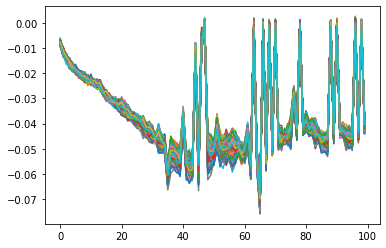

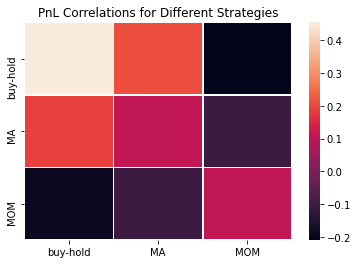

Discriminator Loss: -0.00000714 Generator Loss: -0.00222079:  64%|███████████▌      | 639/1000 [26:37<14:23,  2.39s/it]

current fake and real ves and funres:  tensor([ 0.0330, -0.0272], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0330, -0.0272], device='cuda:0', grad_fn=<SelectBackward0>)


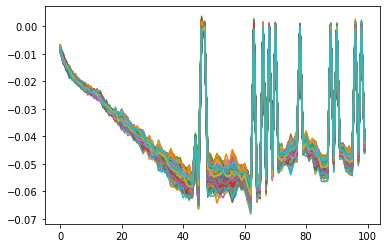

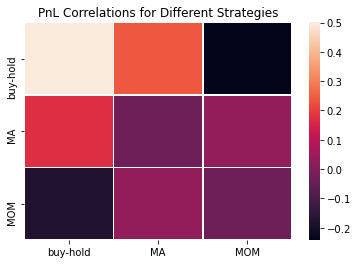

Discriminator Loss: 0.00001393 Generator Loss: -0.00228669:  65%|████████████▎      | 649/1000 [27:02<14:05,  2.41s/it]

current fake and real ves and funres:  tensor([ 0.0332, -0.0277], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0311, -0.0267], device='cuda:0', grad_fn=<SelectBackward0>)


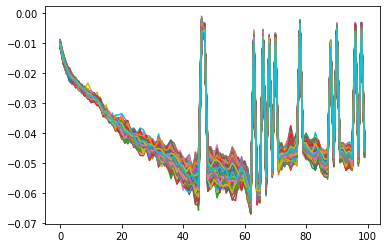

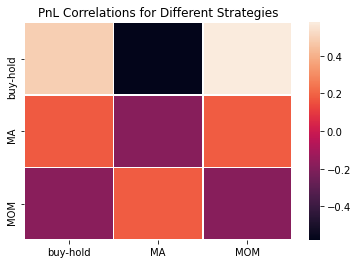

Discriminator Loss: -0.00000783 Generator Loss: -0.00223469:  66%|███████████▊      | 659/1000 [27:28<14:07,  2.48s/it]

current fake and real ves and funres:  tensor([ 0.0333, -0.0275], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0341, -0.0282], device='cuda:0', grad_fn=<SelectBackward0>)


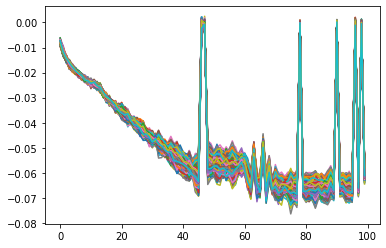

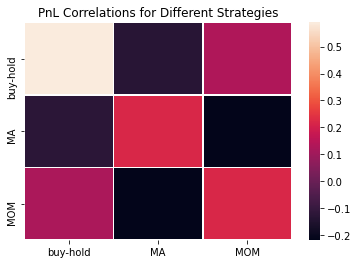

Discriminator Loss: 0.00003547 Generator Loss: -0.00231035:  67%|████████████▋      | 669/1000 [27:55<14:20,  2.60s/it]

current fake and real ves and funres:  tensor([ 0.0337, -0.0284], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0329, -0.0274], device='cuda:0', grad_fn=<SelectBackward0>)


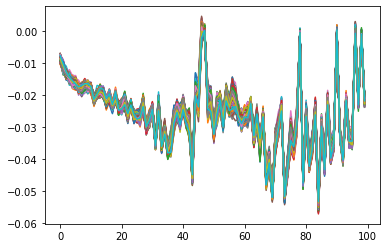

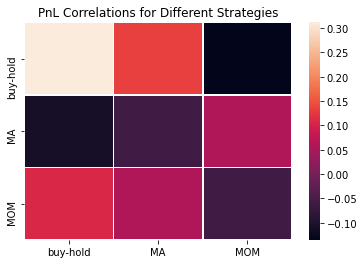

Discriminator Loss: -0.00002520 Generator Loss: -0.00214277:  68%|████████████▏     | 679/1000 [28:21<12:59,  2.43s/it]

current fake and real ves and funres:  tensor([ 0.0323, -0.0272], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0327, -0.0277], device='cuda:0', grad_fn=<SelectBackward0>)


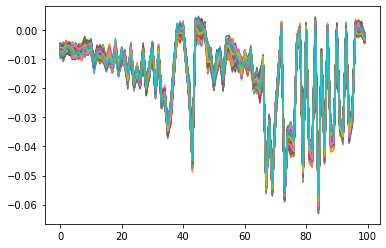

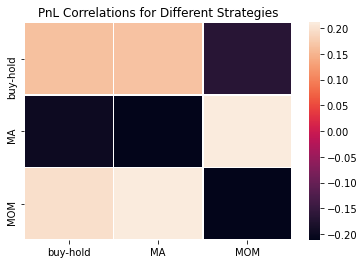

Discriminator Loss: -0.00002540 Generator Loss: -0.00226255:  69%|████████████▍     | 689/1000 [28:47<12:46,  2.46s/it]

current fake and real ves and funres:  tensor([ 0.0325, -0.0274], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0314, -0.0263], device='cuda:0', grad_fn=<SelectBackward0>)


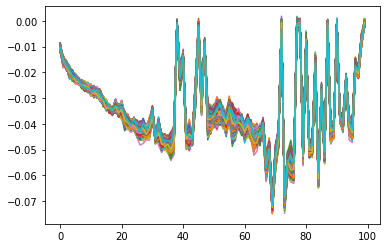

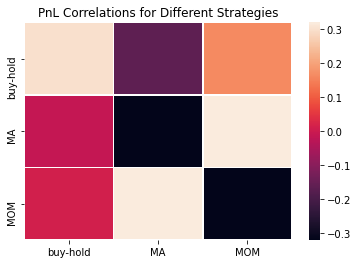

Discriminator Loss: -0.00001941 Generator Loss: -0.00229303:  70%|████████████▌     | 699/1000 [29:13<11:57,  2.38s/it]

current fake and real ves and funres:  tensor([ 0.0335, -0.0277], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0332, -0.0274], device='cuda:0', grad_fn=<SelectBackward0>)


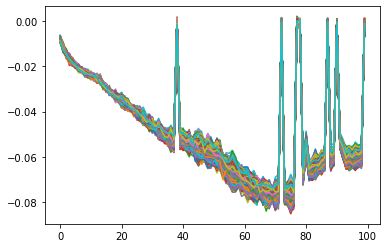

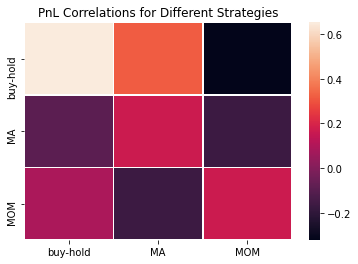

Discriminator Loss: -0.00000801 Generator Loss: -0.00238619:  71%|████████████▊     | 709/1000 [29:37<11:32,  2.38s/it]

current fake and real ves and funres:  tensor([ 0.0341, -0.0282], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0343, -0.0284], device='cuda:0', grad_fn=<SelectBackward0>)


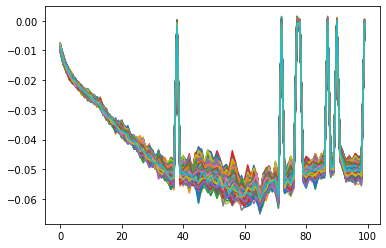

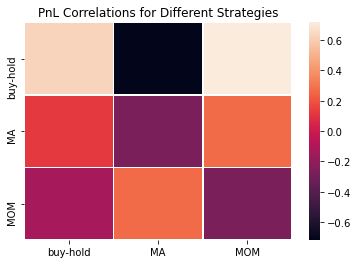

Discriminator Loss: 0.00001149 Generator Loss: -0.00231605:  72%|█████████████▋     | 719/1000 [30:02<11:11,  2.39s/it]

current fake and real ves and funres:  tensor([ 0.0334, -0.0282], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0330, -0.0276], device='cuda:0', grad_fn=<SelectBackward0>)


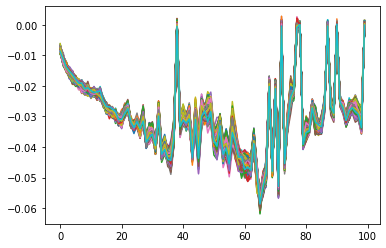

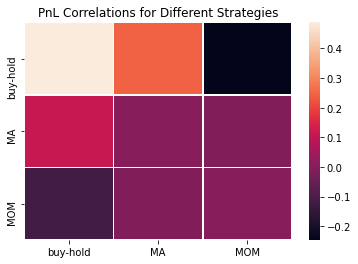

Discriminator Loss: -0.00000858 Generator Loss: -0.00224052:  73%|█████████████     | 729/1000 [30:27<10:44,  2.38s/it]

current fake and real ves and funres:  tensor([ 0.0329, -0.0278], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0303, -0.0264], device='cuda:0', grad_fn=<SelectBackward0>)


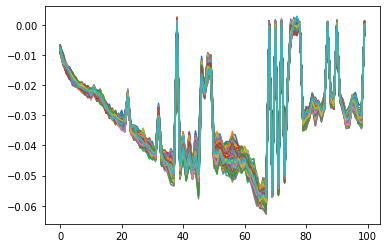

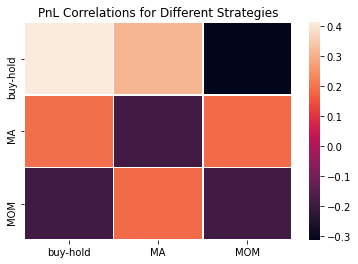

Discriminator Loss: -0.00001411 Generator Loss: -0.00228231:  74%|█████████████▎    | 739/1000 [30:52<10:21,  2.38s/it]

current fake and real ves and funres:  tensor([ 0.0318, -0.0269], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0329, -0.0279], device='cuda:0', grad_fn=<SelectBackward0>)


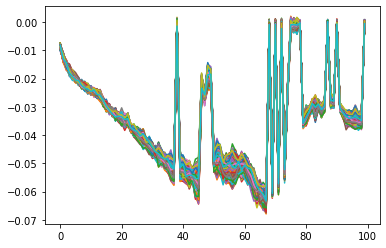

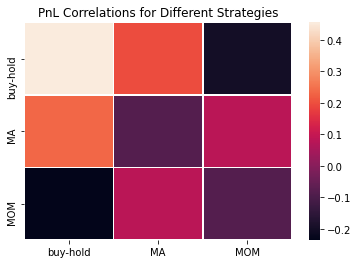

Discriminator Loss: -0.00000670 Generator Loss: -0.00228635:  75%|█████████████▍    | 749/1000 [31:18<10:01,  2.40s/it]

current fake and real ves and funres:  tensor([ 0.0331, -0.0282], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0323, -0.0274], device='cuda:0', grad_fn=<SelectBackward0>)


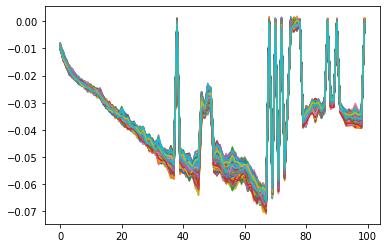

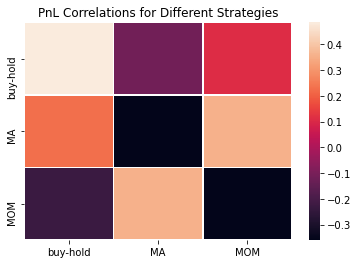

Discriminator Loss: -0.00000329 Generator Loss: -0.00226682:  76%|█████████████▋    | 759/1000 [31:43<09:32,  2.38s/it]

current fake and real ves and funres:  tensor([ 0.0329, -0.0283], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0317, -0.0270], device='cuda:0', grad_fn=<SelectBackward0>)


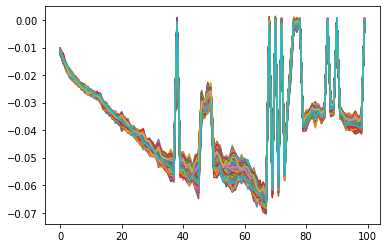

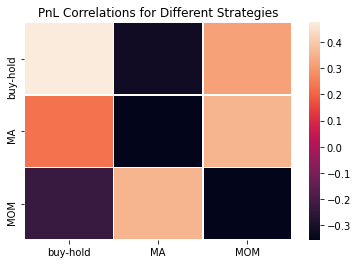

Discriminator Loss: -0.00002088 Generator Loss: -0.00233440:  77%|█████████████▊    | 769/1000 [32:08<09:06,  2.37s/it]

current fake and real ves and funres:  tensor([ 0.0326, -0.0277], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0332, -0.0283], device='cuda:0', grad_fn=<SelectBackward0>)


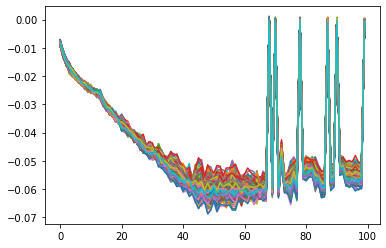

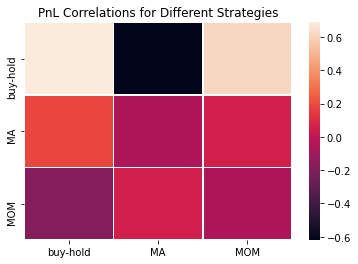

Discriminator Loss: -0.00000284 Generator Loss: -0.00226765:  78%|██████████████    | 779/1000 [32:33<08:40,  2.36s/it]

current fake and real ves and funres:  tensor([ 0.0328, -0.0284], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0330, -0.0286], device='cuda:0', grad_fn=<SelectBackward0>)


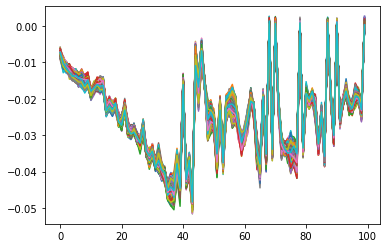

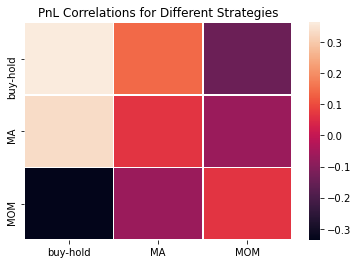

Discriminator Loss: -0.00002217 Generator Loss: -0.00233291:  79%|██████████████▏   | 789/1000 [32:58<08:23,  2.39s/it]

current fake and real ves and funres:  tensor([ 0.0328, -0.0282], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0316, -0.0271], device='cuda:0', grad_fn=<SelectBackward0>)


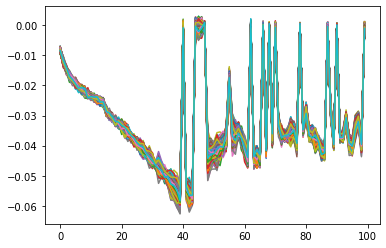

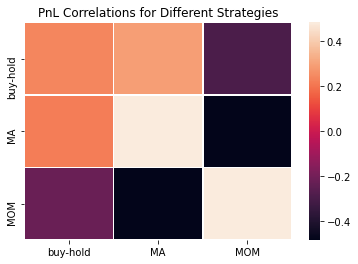

Discriminator Loss: -0.00002290 Generator Loss: -0.00241100:  80%|██████████████▍   | 799/1000 [33:25<09:17,  2.77s/it]

current fake and real ves and funres:  tensor([ 0.0329, -0.0280], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0331, -0.0281], device='cuda:0', grad_fn=<SelectBackward0>)


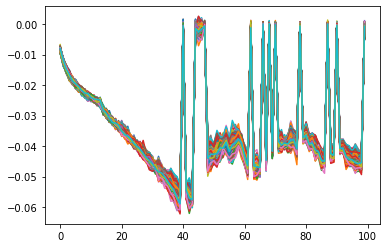

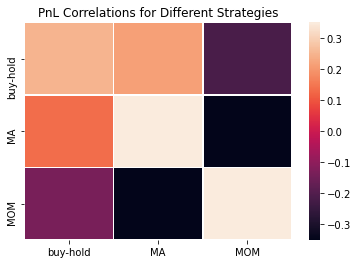

Discriminator Loss: -0.00002024 Generator Loss: -0.00250020:  81%|██████████████▌   | 809/1000 [33:54<08:17,  2.60s/it]

current fake and real ves and funres:  tensor([ 0.0336, -0.0283], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0342, -0.0287], device='cuda:0', grad_fn=<SelectBackward0>)


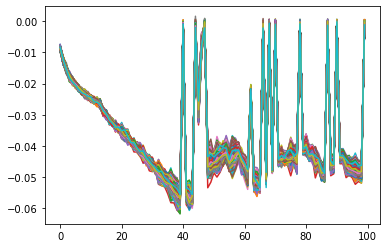

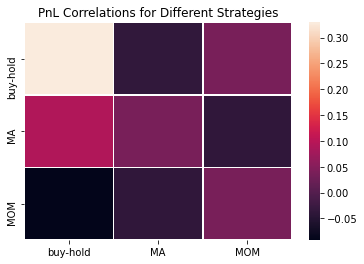

Discriminator Loss: -0.00000250 Generator Loss: -0.00268023:  82%|██████████████▋   | 819/1000 [34:19<07:15,  2.41s/it]

current fake and real ves and funres:  tensor([ 0.0351, -0.0290], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0346, -0.0286], device='cuda:0', grad_fn=<SelectBackward0>)


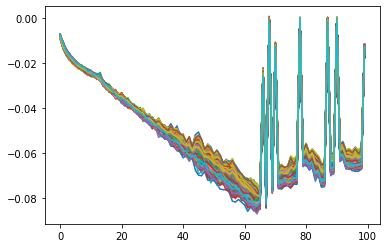

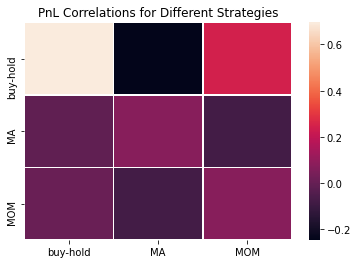

Discriminator Loss: 0.00003452 Generator Loss: -0.00258315:  83%|███████████████▊   | 829/1000 [34:44<06:47,  2.38s/it]

current fake and real ves and funres:  tensor([ 0.0348, -0.0296], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0351, -0.0297], device='cuda:0', grad_fn=<SelectBackward0>)


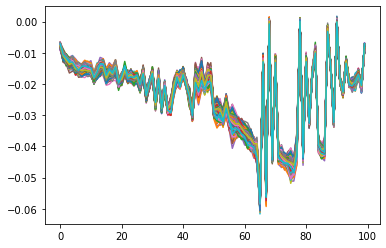

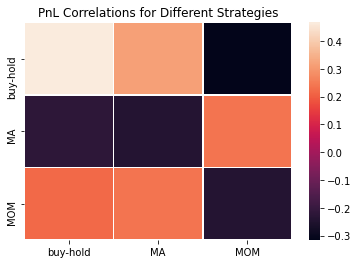

Discriminator Loss: -0.00001791 Generator Loss: -0.00250352:  84%|███████████████   | 839/1000 [35:09<06:22,  2.38s/it]

current fake and real ves and funres:  tensor([ 0.0334, -0.0286], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0343, -0.0293], device='cuda:0', grad_fn=<SelectBackward0>)


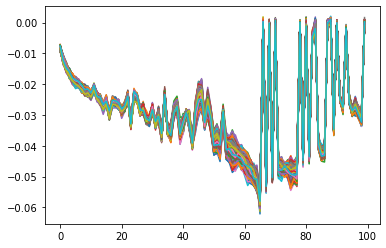

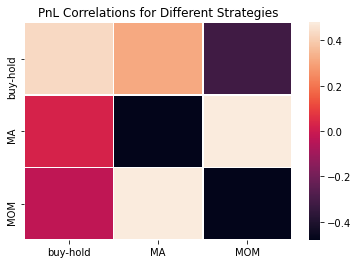

Discriminator Loss: -0.00001974 Generator Loss: -0.00251486:  85%|███████████████▎  | 849/1000 [35:34<06:00,  2.39s/it]

current fake and real ves and funres:  tensor([ 0.0337, -0.0287], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0338, -0.0288], device='cuda:0', grad_fn=<SelectBackward0>)


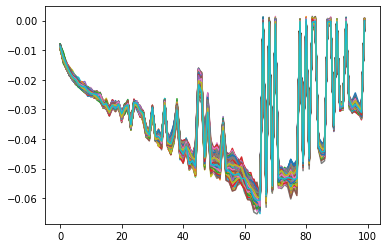

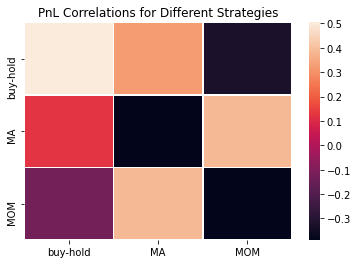

Discriminator Loss: -0.00001328 Generator Loss: -0.00260790:  86%|███████████████▍  | 859/1000 [35:59<05:39,  2.41s/it]

current fake and real ves and funres:  tensor([ 0.0327, -0.0280], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0348, -0.0295], device='cuda:0', grad_fn=<SelectBackward0>)


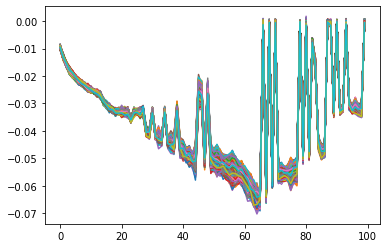

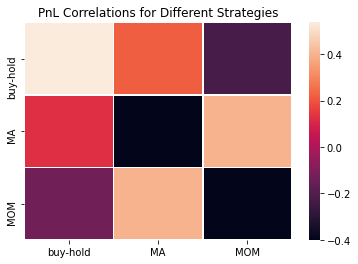

Discriminator Loss: 0.00000414 Generator Loss: -0.00261007:  87%|████████████████▌  | 869/1000 [36:24<05:11,  2.38s/it]

current fake and real ves and funres:  tensor([ 0.0332, -0.0286], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0318, -0.0274], device='cuda:0', grad_fn=<SelectBackward0>)


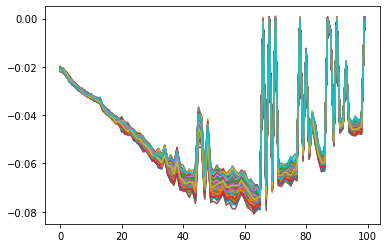

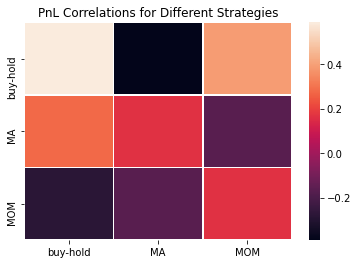

Discriminator Loss: 0.00000883 Generator Loss: -0.00261221:  88%|████████████████▋  | 879/1000 [36:49<04:47,  2.38s/it]

current fake and real ves and funres:  tensor([ 0.0342, -0.0296], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0338, -0.0291], device='cuda:0', grad_fn=<SelectBackward0>)


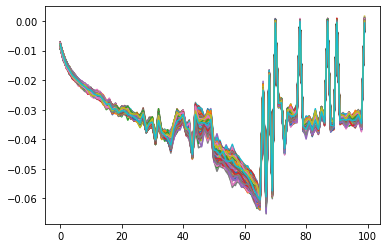

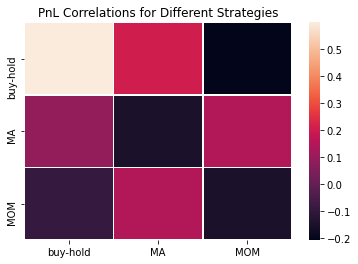

Discriminator Loss: -0.00001251 Generator Loss: -0.00248432:  89%|████████████████  | 889/1000 [37:14<04:24,  2.39s/it]

current fake and real ves and funres:  tensor([ 0.0338, -0.0294], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0336, -0.0292], device='cuda:0', grad_fn=<SelectBackward0>)


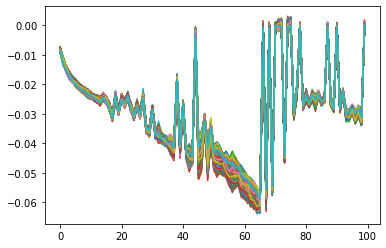

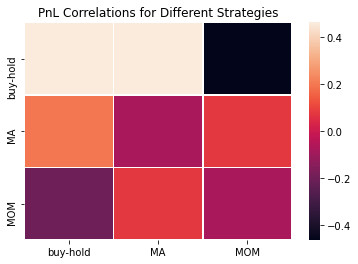

Discriminator Loss: -0.00000742 Generator Loss: -0.00254777:  90%|████████████████▏ | 899/1000 [37:39<04:00,  2.38s/it]

current fake and real ves and funres:  tensor([ 0.0324, -0.0282], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0342, -0.0295], device='cuda:0', grad_fn=<SelectBackward0>)


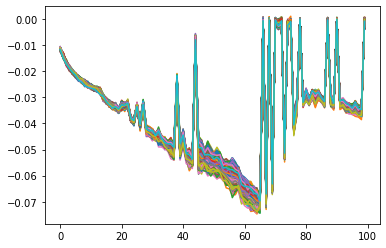

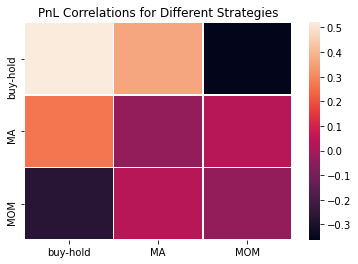

Discriminator Loss: 0.00000319 Generator Loss: -0.00245715:  91%|█████████████████▎ | 909/1000 [38:04<03:36,  2.38s/it]

current fake and real ves and funres:  tensor([ 0.0333, -0.0293], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0326, -0.0286], device='cuda:0', grad_fn=<SelectBackward0>)


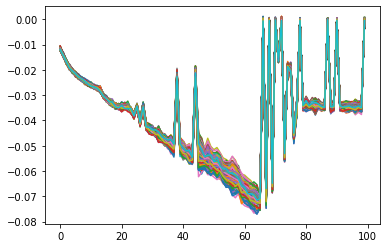

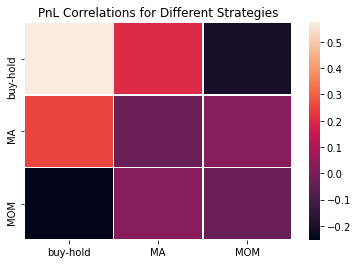

Discriminator Loss: -0.00000245 Generator Loss: -0.00242206:  92%|████████████████▌ | 919/1000 [38:29<03:11,  2.37s/it]

current fake and real ves and funres:  tensor([ 0.0323, -0.0287], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0320, -0.0283], device='cuda:0', grad_fn=<SelectBackward0>)


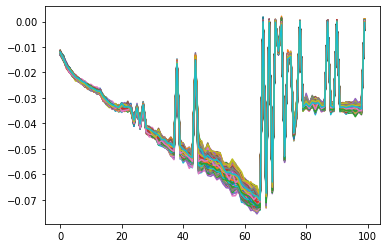

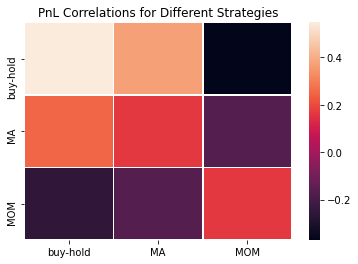

Discriminator Loss: -0.00000578 Generator Loss: -0.00234224:  93%|████████████████▋ | 929/1000 [38:54<02:49,  2.38s/it]

current fake and real ves and funres:  tensor([ 0.0330, -0.0295], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0314, -0.0279], device='cuda:0', grad_fn=<SelectBackward0>)


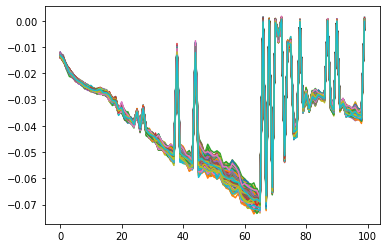

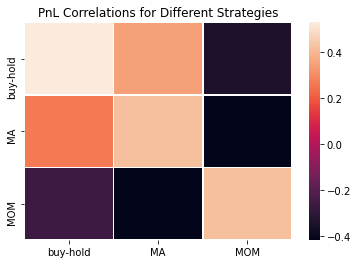

Discriminator Loss: -0.00001654 Generator Loss: -0.00233783:  94%|████████████████▉ | 939/1000 [39:19<02:25,  2.39s/it]

current fake and real ves and funres:  tensor([ 0.0326, -0.0291], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0325, -0.0288], device='cuda:0', grad_fn=<SelectBackward0>)


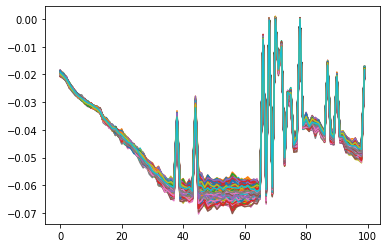

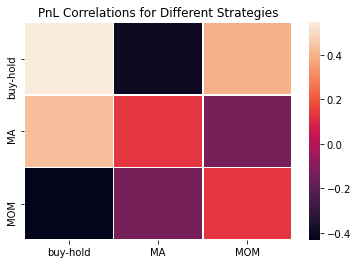

Discriminator Loss: 0.00000561 Generator Loss: -0.00232961:  95%|██████████████████ | 949/1000 [39:44<02:01,  2.39s/it]

current fake and real ves and funres:  tensor([ 0.0325, -0.0290], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0328, -0.0296], device='cuda:0', grad_fn=<SelectBackward0>)


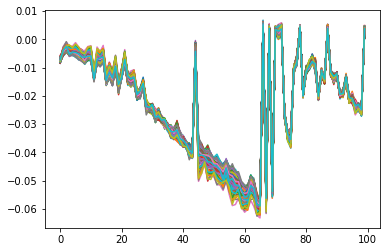

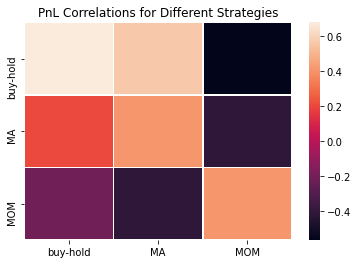

Discriminator Loss: -0.00000238 Generator Loss: -0.00227748:  96%|█████████████████▎| 959/1000 [40:10<01:39,  2.43s/it]

current fake and real ves and funres:  tensor([ 0.0325, -0.0295], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0326, -0.0296], device='cuda:0', grad_fn=<SelectBackward0>)


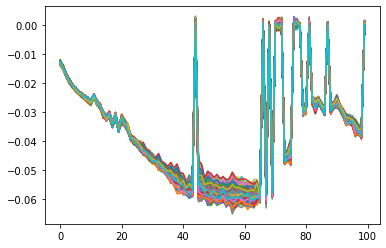

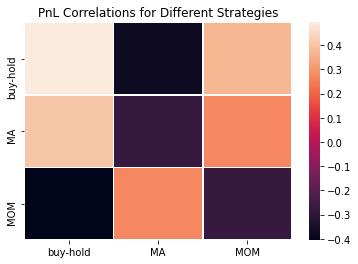

Discriminator Loss: -0.00000365 Generator Loss: -0.00230139:  97%|█████████████████▍| 969/1000 [40:35<01:13,  2.39s/it]

current fake and real ves and funres:  tensor([ 0.0326, -0.0297], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0329, -0.0300], device='cuda:0', grad_fn=<SelectBackward0>)


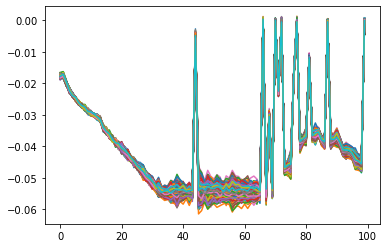

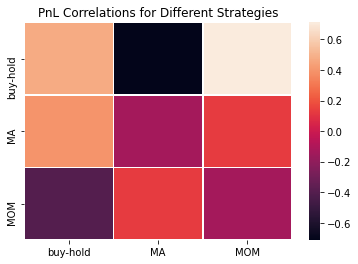

Discriminator Loss: -0.00000398 Generator Loss: -0.00226747:  98%|█████████████████▌| 979/1000 [41:00<00:51,  2.47s/it]

current fake and real ves and funres:  tensor([ 0.0322, -0.0295], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0320, -0.0293], device='cuda:0', grad_fn=<SelectBackward0>)


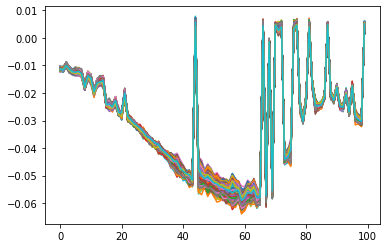

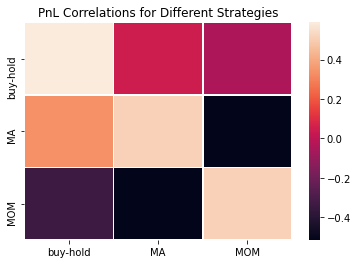

Discriminator Loss: -0.00001377 Generator Loss: -0.00223983:  99%|█████████████████▊| 989/1000 [41:25<00:26,  2.38s/it]

current fake and real ves and funres:  tensor([ 0.0317, -0.0288], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0324, -0.0298], device='cuda:0', grad_fn=<SelectBackward0>)


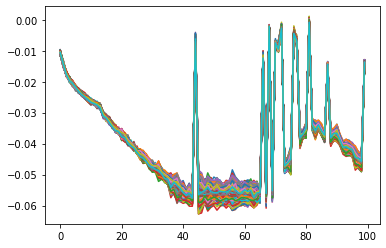

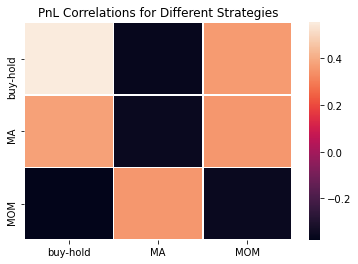

Discriminator Loss: -0.00000755 Generator Loss: -0.00227349: 100%|█████████████████▉| 999/1000 [41:51<00:02,  2.39s/it]

current fake and real ves and funres:  tensor([ 0.0322, -0.0298], device='cuda:0', grad_fn=<SelectBackward0>) tensor([ 0.0321, -0.0295], device='cuda:0', grad_fn=<SelectBackward0>)


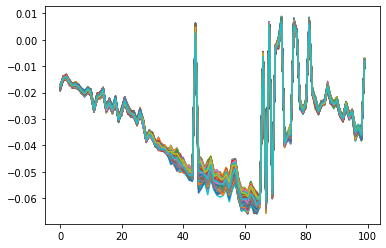

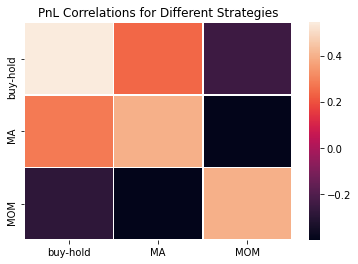

Discriminator Loss: -0.00000900 Generator Loss: -0.00224419: 100%|█████████████████| 1000/1000 [41:55<00:00,  2.52s/it]


In [7]:
train = True
# batch*pnl
signal = 8e-3
lookback = 15
trade_strategy_1 = TradingStrategy("buy-hold",lookback,(0,0),(signal,signal))
trade_strategy_2 = TradingStrategy("MA",lookback,(0,0),(signal,signal))
trade_strategy_3 = TradingStrategy("MOM",lookback,(0,0),(signal,signal))
trade_strategy_lst = [trade_strategy_1,trade_strategy_2,trade_strategy_3]
mse_loss = torch.nn.MSELoss()
if train:

#     dataset = PriceScenarioDataset(lo30_data,pnl_size, 1,True)
#     dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size)
#     dataset = Loader32(log_returns_preprocessed, 1)
#     dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size)
    c=0
    t = tqdm(range(1000))
    for epoch in t:
        for idx, data in enumerate(dataloader, 0):
            generator.train()
            discriminator.train()
#             print(data.shape)
            c+=1
#             print(idx,epoch)
            if True: #(idx<=10 and epoch ==0) or epoch!=0:
                discriminator.zero_grad()
#                 print(data)
                ps_real = data#.permute(0,2,1).squeeze(-1)
    #             score_real = data[-1].reshape(batch_size,-1)

                ps_fake = generator(mean=0, std=1).reshape(batch_size,-1).detach()
                
                disc_loss = 0
                ve_loss = 0
                for trade_strategy in trade_strategy_lst:

                    ts_real = trade_strategy.get_strategy_PnL(ps_real)#,torch.ones_like(ps_real))
                    ts_fake = trade_strategy.get_strategy_PnL(ps_fake)#,torch.ones_like(ps_fake))

                    fake_ve = discriminator(ts_fake)
                    fake_v,fake_e = fake_ve[:,0],fake_ve[:,1]
                    real_ve = discriminator(ts_real)
                    real_v,real_e = real_ve[:,0],real_ve[:,1]
#                     if idx % 180 == 0:
#                         print("disc:current fake and real ves: ",fake_ve[0],real_ve[0])


                    disc_loss -= torch.mean(score(fake_v,fake_e,ts_real,0.05)) - \
                                          torch.mean(score(real_v,real_e,ts_real,0.05))
    
                    
#                     real_v_funres = VaR(0.05,ts_real)
#                     real_e_funres = ES(0.05,ts_real)
#                     ve_loss += mse_loss(real_v,real_v_funres)
#                     ve_loss += mse_loss(real_e,real_e_funres)
#                     fake_v_funres = VaR(0.05,ts_fake)
#                     fake_e_funres = ES(0.05,ts_fake)
#                     ve_loss += mse_loss(fake_v,fake_v_funres)
#                     ve_loss += mse_loss(fake_e,fake_e_funres)
     

    #             print('Discriminator Loss: %.8f' % (disc_loss.item()))
                disc_loss/=len(trade_strategy_lst)
#                 ve_loss/=len(trade_strategy_lst)*4
#                 disc_loss+=ve_loss
                disc_loss.backward()

                disc_optimizer.step()
#                 scheduler_disc.step()
            

#             discriminator.zero_grad()
#             real = data.to(device)
#             batch_size, seq_len = real.size(0), real.size(1)
#             noise = torch.randn(batch_size, nz, seq_len, device=device)
#             fake = generator(noise).detach()
#             disc_loss = -torch.mean(discriminator(real)) + torch.mean(discriminator(fake))
#             disc_loss.backward()
#             disc_optimizer.step()

#             for dp in discriminator.parameters():
#                 dp.data.clamp_(-clip, clip)
    
            if True: #not (idx<=10 and epoch ==0):# or idx % 2 == 0:
                for _ in range(1):
                    generator.zero_grad()
                    discriminator.zero_grad()
                    ps_fake = generator(mean=0, std=1).reshape(batch_size,-1)
                    gen_loss = 0
                    for trade_strategy in trade_strategy_lst:
                        ts_real = trade_strategy.get_strategy_PnL(ps_real)
                        ts_fake = trade_strategy.get_strategy_PnL(ps_fake)
                        fake_ve = discriminator(ts_fake)
                        fake_v,fake_e = fake_ve[:,0],fake_ve[:,1]

        #                 print(fake_ve[0],"asdsa")

                        gen_loss += torch.mean(score(fake_v,fake_e,ts_real,0.05))

    #                 gen_loss = -torch.mean(discriminator(generator(noise)))
                    gen_loss/=len(trade_strategy_lst)
                    gen_loss.backward()
                    gen_optimizer.step()
#                     scheduler_gen.step()
#                 if idx % 180 == 0:
#                     print("gen:current fake ve: ",fake_ve[0])
                    
        if (epoch+1)%10==0:
            generator.eval()
            print("current fake and real ves and funres: ",fake_ve[0],real_ve[0])#,real_v_funres[0],real_e_funres[0])
            for _ in range(1):
                ps_fake = generator(mean=0, std=1).reshape(batch_size,-1).detach().cpu()
                for i in range(len(ps_fake)):
                    plt.plot(list(range(100)),ps_fake[i])
            plt.show()
            labels = ["buy-hold","MA","MOM"]
#                 ps_fake = generator(mean=0, std=1).reshape(batch_size,-1).detach().cuda()
#                 ps_real = next(iter(dataloader))
            ps_fake = generator(mean=0, std=1).reshape(batch_size,-1).detach().cuda()
            ts_real_lst = []
            ts_fake_lst = []
            heat_map = []
            for trade_strategy in trade_strategy_lst:
                ts_real = trade_strategy.get_strategy_PnL(ps_real)
                ts_fake = trade_strategy.get_strategy_PnL(ps_fake)
                ts_real = torch.mean(ts_real,axis = 0)
                ts_fake = torch.mean(ts_fake,axis = 0)
                ts_real_lst.append(ts_real.cpu())
                ts_fake_lst.append(ts_fake.cpu())
            for m in range(len(trade_strategy_lst)):
                temp_heatmap = []
                for n in range(len(trade_strategy_lst)):
                    temp_heatmap.append(np.corrcoef(ts_real_lst[m],ts_fake_lst[n])[0,1])
                heat_map.append(temp_heatmap)
#                 print(model_name,heat_map)
            #plt.imshow(heat_map, cmap='hot', interpolation='nearest')
            ax = sns.heatmap(heat_map, linewidth=0.5)
        #     ax.set_xticks(np.arange(3))
        #     ax.set_yticks(np.arange(3))
            ax.set_xticklabels(labels)
            ax.set_yticklabels(labels)
            ax.set_title("PnL Correlations for Different Strategies")
            plt.show()
            torch.save(generator, f"trained_generator_epoch_{epoch}.pth")
        t.set_description('Discriminator Loss: %.8f Generator Loss: %.8f' % (disc_loss.item(), gen_loss.item()))
            
        # Save

else:
    # Load
    generator = torch.load(f'{generator_path}trained_generator_{file_name}_epoch_{num_epochs-1}.pth')
    generator.eval()